In [1]:
import os
import pandas as pd
from collections import namedtuple
import numpy as np
import pickle
import glob


base_directory = os.path.abspath(os.curdir)
data_directory = os.path.join(base_directory, "data")

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
tuning_file_path = os.path.join(data_directory,'SintecMedia.rpt_raw_data.date_2015-01-04.2015-01-12.pd')

tuning_headers = ['MSO_Code', 'Device ID', 'Event Date', 'Event Time',
                  'Event Type', 'Event Value', 'Event Name', 'Event ID']
tuning_dtypes_list = ['float', str, str, str, str, 'float', str, 'float']
tuning_dtype_mapping = dict(zip(tuning_headers,tuning_dtypes_list))

# Tuning = namedtuple("Tuning", ",".join(tuning_headers))

view_file_path = os.path.join(data_directory,'SintecMedia.rpt_prog_view.date_2015-01-04.2016-11-21.pd')

view_headers = ['MSO_Code', 'Device ID', 'Event Date', 'Event Time', 'Station Number', 'Program Code']
view_dtypes_list = ['float', str, str, str, 'float', str]
view_dtype_mapping = dict(zip(view_headers, view_dtypes_list))

# View = namedtuple("View", ",".join(view_headers))


prog_file_path = os.path.join(data_directory, 'SintecMedia.rpt_programs.date_2015-01-04.2016-11-21.pd')

prog_headers = ['Program Code', 'Program Title', 'Program Genre', 'Air Date', 'Air Time', 'Duration']
prog_dtypes_list = [str, str, str, str, str, float]
prog_dtype_mapping = dict(zip(prog_headers,prog_dtypes_list))

# Prog = namedtuple("Prog", ",".join(prog_headers))





# df_program_viewing_temp = pd.read_csv(prog_file_path, sep='|',header=None,
#                              names=prog_headers, dtype=prog_dtype_mapping, na_values=np.nan)


NameError: name 'os' is not defined

In [3]:
df_tuning = pd.read_csv(tuning_file_path, sep='|',header=None,
                             names=tuning_headers, dtype=tuning_dtype_mapping, na_values=np.nan)

In [4]:
df_program_viewing = pd.read_csv(view_file_path, sep='|',header=None,
                             names=view_headers, dtype=view_dtype_mapping, na_values=np.nan,)

In [5]:
df_daily_program = pd.read_csv(prog_file_path, sep='|',header=None,
                             names=prog_headers, dtype=prog_dtype_mapping, na_values=np.nan,)

In [61]:
dates = set()
top_idx = 0
with open(file_path, 'r') as file:
    for idx, line in enumerate(file):
        top_idx = idx
        t_l = Tuning._make(line.split("|"))
#         if t_l.event_date not in dates:
#         print(set([t_l.event_date]))
        dates = dates.union(set([t_l.event_date]))
top_idx, datesr

(18913933, {'20150104'})

In [6]:
file_path = os.path.join(data_directory,'SintecMedia.rpt_prog_view.date_2015-01-04.2016-11-21.pd')

dates = set()
top_idx = 0
with open(file_path, 'r') as file:
    for idx, line in enumerate(file):
        top_idx = idx
        p_v = Prog._make(line.split("|"))
        if p_v.station_num == 'ESPNHD':
            print(p_v)
            break
        dates = dates.union(set([p_v.event_date]))
top_idx, dates

(17302143, {'20150104'})

In [42]:
view_all_files = sorted(glob.glob("{}{}raw_viewing_*.pkl.gz".format(data_directory,os.sep)))
df_program_viewing = pd.concat((pd.read_pickle(file_name) for file_name in view_all_files), ignore_index=True)

prog_all_files = sorted(glob.glob("{}{}programs_code_*.pkl.gz".format(data_directory,os.sep)))
df_daily_program = pd.concat((pd.read_pickle(file_name) for file_name in prog_all_files), ignore_index=True)

tuning_all_files = sorted(glob.glob("{}{}raw_tuning_*.pkl.gz".format(data_directory,os.sep)))
df_tuning = pd.concat((pd.read_pickle(file_name) for file_name in tuning_all_files), ignore_index=True)


In [600]:
df_daily_program = pd.read_csv(os.path.join(data_directory, "DailyProgramData_04012015.csv"), header=0, thousands=',',low_memory=False)
df_program_viewing = pd.read_csv(os.path.join(data_directory, "ProgramViewingData04012015-1.csv"), header=0, thousands=',',low_memory=False)
df_tuning = pd.read_csv(os.path.join(data_directory, "TuningData04012015-1.csv"), header=0, thousands=',',low_memory=False)

# To fix:
* television keep running, even after it was turned off
* different program code for the same program title - dill with duplicates 
* add indicator for end of seq
* make sure the order is by time
* add the bins to the data
* add day of the week feature
* time of day (bins of 6)
* completion_precent - check the bins, but probabily 5
* drop < 1:30 mins
* true labels


In [80]:
# Padding time 
df_tuning['Event Time'] = df_tuning['Event Time'].astype('str').str.pad(6, side='left', fillchar='0')
df_tuning['End_Time'] = df_tuning['End_Time'].astype('str').str.pad(6, side='left', fillchar='0')

# Calculate the time between begin and end watching
df_tuning['WatchigTime'] = pd.to_datetime(df_tuning['End_Time'], format='%H%M%S') - pd.to_datetime(df_tuning['event_time'], format='%H%M%S')

df_tuning['WatchigTime'] = df_tuning['WatchigTime'].dt.seconds

df_tuning

KeyError: 'End_Time'

In [349]:
 len(df_daily_program['Program Title'].unique())
    
# 10642 unique

for title, df in df_daily_program.groupby('Program Title'):
    if len(df['Program Code'].unique()) > 1:
        print(df)

         Program Code      Program Title Program Genre  Air Date  Air Time  \
21732  SH010662180000  10 Minute Workout        Health  20150104     20000   
21733  SH010662180000  10 Minute Workout        Health  20150104     23000   
21734  SH010662180000  10 Minute Workout        Health  20150104     83000   
21735  SH010662180000  10 Minute Workout        Health  20150104     90000   
21736  SH010662180000  10 Minute Workout        Health  20150104    123000   
21737  SH010662180000  10 Minute Workout        Health  20150104    153000   
21738  SH010662180000  10 Minute Workout        Health  20150104    183000   
21739  SH010662180000  10 Minute Workout        Health  20150104    213000   
21740  SH010662180000  10 Minute Workout        Health  20150105         0   
21741  SH010662180000  10 Minute Workout        Health  20150105     10000   
21742  SH010662180000  10 Minute Workout        Health  20150105     13000   
21743  SH010662180000  10 Minute Workout        Health  20150105

         Program Code  Program Title Program Genre  Air Date  Air Time  \
16833  SH002868040000  Abundant Life     Religious  20150104    153000   
26396  SH016710180000  Abundant Life     Religious  20150104    130000   

       Duration  
16833      30.0  
26396      30.0  
         Program Code     Program Title               Program Genre  Air Date  \
1912   EP001887075132  Access Hollywood  Newsmagazine,Entertainment  20150104   
1913   EP001887075165  Access Hollywood  Newsmagazine,Entertainment  20150104   
1914   EP001887075165  Access Hollywood  Newsmagazine,Entertainment  20150104   
1915   EP001887075165  Access Hollywood  Newsmagazine,Entertainment  20150104   
1916   EP001887075165  Access Hollywood  Newsmagazine,Entertainment  20150104   
1917   EP001887075165  Access Hollywood  Newsmagazine,Entertainment  20150104   
1918   EP001887075165  Access Hollywood  Newsmagazine,Entertainment  20150104   
1919   EP001887075165  Access Hollywood  Newsmagazine,Entertainment  201501

        Program Code      Program Title        Program Genre  Air Date  \
9679  EP016450990035  America Unearthed  Documentary,History  20150104   
9680  EP016450990035  America Unearthed  Documentary,History  20150104   
9681  EP016450990038  America Unearthed  Documentary,History  20150104   
9682  EP016450990038  America Unearthed  Documentary,History  20150104   

      Air Time  Duration  
9679     10000      60.0  
9680     50000      60.0  
9681     20000      60.0  
9682     60000      60.0  
         Program Code           Program Title   Program Genre  Air Date  \
11675  EP019785140004  America by the Numbers  Public affairs  20150104   
11676  EP019785140004  America by the Numbers  Public affairs  20150104   
11677  EP019785140007  America by the Numbers  Public affairs  20150104   

       Air Time  Duration  
11675    183000      30.0  
11676    230000      30.0  
11677    153000      30.0  
         Program Code        Program Title       Program Genre  Air Date  \
4561 

16037  20150104    150000      30.0  
        Program Code    Program Title          Program Genre  Air Date  \
1557  EP000768040049  As Time Goes By  Sitcom,Romance-comedy  20150104   
1558  EP000768040049  As Time Goes By  Sitcom,Romance-comedy  20150104   
1559  EP000768040049  As Time Goes By  Sitcom,Romance-comedy  20150104   
1560  EP000768040067  As Time Goes By  Sitcom,Romance-comedy  20150104   
1561  EP000768040067  As Time Goes By  Sitcom,Romance-comedy  20150104   
1562  EP000768040098  As Time Goes By  Sitcom,Romance-comedy  20150104   
1563  EP000768040098  As Time Goes By  Sitcom,Romance-comedy  20150104   
1564  EP000768040098  As Time Goes By  Sitcom,Romance-comedy  20150105   

      Air Time  Duration  
1557     30000      30.0  
1558     80000      30.0  
1559     90000      30.0  
1560     20000      60.0  
1561     70000      60.0  
1562     30000      30.0  
1563    190000      30.0  
1564         0      30.0  
        Program Code       Program Title  \
3340  EP

        Program Code      Program Title Program Genre  Air Date  Air Time  \
7154  EP012155570278  Best Recipes Ever       Cooking  20150104    100000   
7155  EP012155570278  Best Recipes Ever       Cooking  20150104    120000   
7156  EP012155570411  Best Recipes Ever       Cooking  20150104    160000   
7157  EP012155570411  Best Recipes Ever       Cooking  20150104    170000   

      Duration  
7154      30.0  
7155      30.0  
7156      30.0  
7157      30.0  
         Program Code       Program Title Program Genre  Air Date  Air Time  \
10172  EP017377850053  Beverly Hills Pawn       Reality  20150104    173000   
10173  EP017377850058  Beverly Hills Pawn       Reality  20150104    170000   

       Duration  
10172      30.0  
10173      30.0  
         Program Code Program Title Program Genre  Air Date  Air Time  \
11734  EP019961300003   Beyond Geek       Science  20150104    233000   
11735  EP019961300005   Beyond Geek       Science  20150105     53000   
11736  EP019961300

10448      60.0  
        Program Code       Program Title              Program Genre  Air Date  \
8831  EP014757600004  Bordertown: Laredo  Reality,Documentary,Crime  20150105   
8832  EP014757600004  Bordertown: Laredo  Reality,Documentary,Crime  20150105   
8833  EP014757600008  Bordertown: Laredo  Reality,Documentary,Crime  20150105   
8834  EP014757600008  Bordertown: Laredo  Reality,Documentary,Crime  20150105   

      Air Time  Duration  
8831     30000      30.0  
8832     70000      30.0  
8833     33000      30.0  
8834     73000      30.0  
         Program Code    Program Title         Program Genre  Air Date  \
8590   EP014417700080  Born to Explore  Outdoors,Educational  20150104   
8591   EP014417700080  Born to Explore  Outdoors,Educational  20150104   
8592   EP014417700080  Born to Explore  Outdoors,Educational  20150104   
8593   EP014417700080  Born to Explore  Outdoors,Educational  20150104   
8594   EP014417700080  Born to Explore  Outdoors,Educational  20150104 

         Program Code  Program Title    Program Genre  Air Date  Air Time  \
7843   EP013152200101  Café San Juan  Reality,Cooking  20150105      3000   
7844   EP013152200101  Café San Juan  Reality,Cooking  20150105     83000   
7845   EP013152200102  Café San Juan  Reality,Cooking  20150105         0   
7846   EP013152200102  Café San Juan  Reality,Cooking  20150105     80000   
23716  SH013152200000  Café San Juan  Reality,Cooking  20150104    163000   

       Duration  
7843       30.0  
7844       30.0  
7845       30.0  
7846       30.0  
23716      30.0  
         Program Code Program Title                  Program Genre  Air Date  \
2235   EP002335490174       Caillou  Children,Educational,Animated  20150104   
2236   EP002335490360       Caillou  Children,Educational,Animated  20150104   
16597  SH002335490000       Caillou  Children,Educational,Animated  20150104   
16598  SH002335490000       Caillou  Children,Educational,Animated  20150104   
16599  SH002335490000       C

       Program Code Program Title Program Genre  Air Date  Air Time  Duration
147  EP000008820083        Cheers        Sitcom  20150104     93000      30.0
148  EP000008820083        Cheers        Sitcom  20150104    123000      30.0
149  EP000008820088        Cheers        Sitcom  20150104     90000      30.0
150  EP000008820088        Cheers        Sitcom  20150104    120000      30.0
        Program Code                  Program Title Program Genre  Air Date  \
9863  EP016983970009  Chef John Besh's Family Table       Cooking  20150104   
9864  EP016983970009  Chef John Besh's Family Table       Cooking  20150104   
9865  EP016983970026  Chef John Besh's Family Table       Cooking  20150104   

      Air Time  Duration  
9863     60000      30.0  
9864     90000      30.0  
9865    203000      30.0  
        Program Code Program Title Program Genre  Air Date  Air Time  Duration
3922  EP006809880004  Chef at Home       Cooking  20150104    213000      30.0
3923  EP006809880009  Chef 

        Program Code                      Program Title Program Genre  \
4909  EP008556560004  Comics Unleashed With Byron Allen        Comedy   
4910  EP008556560004  Comics Unleashed With Byron Allen        Comedy   
4911  EP008556560004  Comics Unleashed With Byron Allen        Comedy   
4912  EP008556560011  Comics Unleashed With Byron Allen        Comedy   
4913  EP008556560011  Comics Unleashed With Byron Allen        Comedy   
4914  EP008556560011  Comics Unleashed With Byron Allen        Comedy   
4915  EP008556560016  Comics Unleashed With Byron Allen        Comedy   
4916  EP008556560016  Comics Unleashed With Byron Allen        Comedy   
4917  EP008556560016  Comics Unleashed With Byron Allen        Comedy   
4918  EP008556560019  Comics Unleashed With Byron Allen        Comedy   
4919  EP008556560019  Comics Unleashed With Byron Allen        Comedy   
4920  EP008556560019  Comics Unleashed With Byron Allen        Comedy   
4921  EP008556560030  Comics Unleashed With Byron A

10287      60.0  
         Program Code Program Title  \
2820   EP003618800004    Cyberchase   
2821   EP003618800020    Cyberchase   
2822   EP003618800020    Cyberchase   
2823   EP003618800020    Cyberchase   
2824   EP003618800020    Cyberchase   
2825   EP003618800020    Cyberchase   
2826   EP003618800020    Cyberchase   
2827   EP003618800041    Cyberchase   
2828   EP003618800055    Cyberchase   
2829   EP003618800055    Cyberchase   
2830   EP003618800095    Cyberchase   
2831   EP003618800095    Cyberchase   
2832   EP003618800097    Cyberchase   
2833   EP003618800112    Cyberchase   
2834   EP003618800114    Cyberchase   
2835   EP003618800114    Cyberchase   
2836   EP003618800114    Cyberchase   
18618  SH006327570000    Cyberchase   
18619  SH006327570000    Cyberchase   
18620  SH006327570000    Cyberchase   
18621  SH006327570000    Cyberchase   

                                          Program Genre  Air Date  Air Time  \
2820   Children,Educational,Science,Technolo

         Program Code Program Title   Program Genre  Air Date  Air Time  \
14519  MV004996800000   Devil's Due          Horror  20150104     30000   
14520  MV004996800000   Devil's Due          Horror  20150104     60000   
14521  MV004996800000   Devil's Due          Horror  20150105     13000   
14522  MV004996800000   Devil's Due          Horror  20150105     43000   
14523  MV004996800000   Devil's Due          Horror  20150105     65000   
14524  MV004996800000   Devil's Due          Horror  20150105     95000   
14527  MV005006290000   Devil's Due  Spanish,Horror  20150104     30000   
14528  MV005006290000   Devil's Due  Spanish,Horror  20150105     13000   
14529  MV005006290000   Devil's Due  Spanish,Horror  20150105     65000   

       Duration  
14519      90.0  
14520      90.0  
14521      90.0  
14522      90.0  
14523      95.0  
14524      95.0  
14527      90.0  
14528      90.0  
14529      95.0  
        Program Code     Program Title                Program Genre  

11352      30.0  
        Program Code Program Title        Program Genre  Air Date  Air Time  \
7656  EP012835790021   Drugs, Inc.          Documentary  20150104     80000   
7657  EP012835790021   Drugs, Inc.          Documentary  20150104    110000   
7658  EP012835790028   Drugs, Inc.          Documentary  20150104     90000   
7659  EP012835790028   Drugs, Inc.          Documentary  20150104    120000   
7660  EP012835790031   Drugs, Inc.          Documentary  20150104     10000   
7661  EP012835790031   Drugs, Inc.          Documentary  20150104     40000   
7662  EP012835790031   Drugs, Inc.          Documentary  20150104     60000   
7663  EP012835790031   Drugs, Inc.          Documentary  20150104     90000   
7664  EP012835790051   Drugs, Inc.  Documentary,Reality  20150104     20000   
7665  EP012835790051   Drugs, Inc.  Documentary,Reality  20150104     40000   
7666  EP012835790051   Drugs, Inc.  Documentary,Reality  20150104     50000   
7667  EP012835790051   Drugs, Inc.

10018      60.0  
         Program Code Program Title Program Genre  Air Date  Air Time  \
1634   EP000841630096      Especial       Special  20150105     10000   
3276   EP004998040093      Especial         Music  20150104     90000   
3277   EP004998040115      Especial         Music  20150104    210000   
7084   EP011975120075      Especial         Music  20150104    130000   
7085   EP011975120087      Especial         Music  20150104    170000   
7086   EP011975120104      Especial         Music  20150105     50000   
16148  SH000841630000      Especial     Computers  20150104     50000   
21352  SH009618360000      Especial         Music  20150104    190000   
21353  SH009618360000      Especial         Music  20150105     30000   
21354  SH009618360000      Especial         Music  20150105     90000   

       Duration  
1634       60.0  
3276       60.0  
3277       60.0  
7084       60.0  
7085       60.0  
7086       60.0  
16148      60.0  
21352      60.0  
21353      60.0 

       Program Code    Program Title                      Program Genre  \
280  EP000015221149  Face the Nation  Talk,News,Public affairs,Politics   
281  EP000015221149  Face the Nation  Talk,News,Public affairs,Politics   
282  EP000015221152  Face the Nation  Talk,News,Public affairs,Politics   
283  EP000015221152  Face the Nation  Talk,News,Public affairs,Politics   
284  EP000015221152  Face the Nation  Talk,News,Public affairs,Politics   
285  EP000015221152  Face the Nation  Talk,News,Public affairs,Politics   
286  EP000015221152  Face the Nation  Talk,News,Public affairs,Politics   
287  EP000015221152  Face the Nation  Talk,News,Public affairs,Politics   
288  EP000015221152  Face the Nation  Talk,News,Public affairs,Politics   
289  EP000015221152  Face the Nation  Talk,News,Public affairs,Politics   
290  EP000015221152  Face the Nation  Talk,News,Public affairs,Politics   
291  EP000015221152  Face the Nation  Talk,News,Public affairs,Politics   
292  EP000015221152  Face

22134    154500      75.0  
         Program Code       Program Title Program Genre  Air Date  Air Time  \
15930  SH000276960000  First Presbyterian     Religious  20150104    160000   
15931  SH000276960000  First Presbyterian     Religious  20150104    170000   
24523  SH014660330000  First Presbyterian     Religious  20150104     80000   

       Duration  
15930      60.0  
15931      60.0  
24523      60.0  
         Program Code                  Program Title      Program Genre  \
15815  SH000240470000  First United Methodist Church          Religious   
20686  SH008862370000  First United Methodist Church  Special,Religious   
22131  SH011218310000  First United Methodist Church  Special,Religious   

       Air Date  Air Time  Duration  
15815  20150104    110000      30.0  
20686  20150104    170000      60.0  
22131  20150104    113000      30.0  
        Program Code Program Title             Program Genre  Air Date  \
7847  EP013160750214    Fish Hooks  Children,Comedy,Anim

        Program Code          Program Title   Program Genre  Air Date  \
5646  EP010316520028  Fresh With Anna Olson  Cooking,How-to  20150104   
5647  EP010316520046  Fresh With Anna Olson  Cooking,How-to  20150104   

      Air Time  Duration  
5646    203000      30.0  
5647    200000      30.0  
        Program Code Program Title Program Genre  Air Date  Air Time  Duration
1699  EP001151270044       Friends        Sitcom  20150104         0      30.0
1700  EP001151270044       Friends        Sitcom  20150104      3000      30.0
1701  EP001151270044       Friends        Sitcom  20150104     20000      30.0
1702  EP001151270044       Friends        Sitcom  20150104     30000      30.0
1703  EP001151270044       Friends        Sitcom  20150104     33000      30.0
1704  EP001151270044       Friends        Sitcom  20150104     40000      30.0
1705  EP001151270044       Friends        Sitcom  20150104     50000      30.0
1706  EP001151270044       Friends        Sitcom  20150104     6000

336  EP000018260036     Get Smart        Sitcom  20150105     83000      30.0
        Program Code     Program Title       Program Genre  Air Date  \
6118  EP010893280081  Ghost Adventures  Reality,Paranormal  20150104   
6119  EP010893280081  Ghost Adventures  Reality,Paranormal  20150104   
6120  EP010893280081  Ghost Adventures  Reality,Paranormal  20150104   
6121  EP010893280084  Ghost Adventures  Reality,Paranormal  20150104   
6122  EP010893280084  Ghost Adventures  Reality,Paranormal  20150104   
6123  EP010893280084  Ghost Adventures  Reality,Paranormal  20150104   
6124  EP010893280084  Ghost Adventures  Reality,Paranormal  20150104   

      Air Time  Duration  
6118     20000      60.0  
6119     50000      60.0  
6120     80000      60.0  
6121     10000      60.0  
6122     40000      60.0  
6123     80000      60.0  
6124    110000      60.0  
        Program Code    Program Title             Program Genre  Air Date  \
4254  EP007537860033  Ghost Whisperer  Drama,Paranor

        Program Code Program Title Program Genre  Air Date  Air Time  Duration
8898  EP014952110029      Guy Code        Comedy  20150104     90000      30.0
8899  EP014952110029      Guy Code        Comedy  20150104    120000      30.0
8900  EP014952110035      Guy Code        Comedy  20150104    100000      30.0
8901  EP014952110035      Guy Code        Comedy  20150104    130000      30.0
8902  EP014952110037      Guy Code        Comedy  20150104     83000      30.0
8903  EP014952110037      Guy Code        Comedy  20150104    113000      30.0
8904  EP014952110042      Guy Code        Comedy  20150104     93000      30.0
8905  EP014952110042      Guy Code        Comedy  20150104    123000      30.0
8906  EP014952110046      Guy Code        Comedy  20150104     80000      30.0
8907  EP014952110046      Guy Code        Comedy  20150104    110000      30.0
8908  EP014952110052      Guy Code        Comedy  20150104    103000      30.0
8909  EP014952110052      Guy Code        Comedy  20

4638     20000     120.0  
        Program Code      Program Title Program Genre  Air Date  Air Time  \
9491  EP015972810028  Highway Thru Hell       Reality  20150104     30000   
9492  EP015972810028  Highway Thru Hell       Reality  20150105     60000   
9493  EP015972810029  Highway Thru Hell       Reality  20150104     40000   
9494  EP015972810029  Highway Thru Hell       Reality  20150105     50000   
9495  EP015972810030  Highway Thru Hell       Reality  20150104     50000   
9496  EP015972810030  Highway Thru Hell       Reality  20150105     40000   
9497  EP015972810031  Highway Thru Hell       Reality  20150105     30000   

      Duration  
9491      60.0  
9492      60.0  
9493      60.0  
9494      60.0  
9495      60.0  
9496      60.0  
9497      60.0  
         Program Code Program Title Program Genre  Air Date  Air Time  \
22869  SH011922660000   Hip Hop Abs      Shopping  20150104     13000   
22870  SH011922660000   Hip Hop Abs      Shopping  20150104     50000   
2

[93 rows x 6 columns]
        Program Code  Program Title        Program Genre  Air Date  Air Time  \
3078  EP004154020058  How It's Made  Science,Documentary  20150105      3000   
3079  EP004154020058  How It's Made  Science,Documentary  20150105     73000   
3080  EP004154020062  How It's Made              Science  20150104    113000   
3081  EP004154020062  How It's Made              Science  20150105     83000   
3082  EP004154020073  How It's Made  Science,Documentary  20150104    160000   
3083  EP004154020079  How It's Made  Science,Documentary  20150104    220000   
3084  EP004154020081  How It's Made  Science,Documentary  20150104    233000   
3085  EP004154020082  How It's Made  Science,Documentary  20150104    173000   
3086  EP004154020097  How It's Made  Science,Documentary  20150104    143000   
3087  EP004154020099  How It's Made  Science,Documentary  20150105     20000   
3088  EP004154020099  How It's Made  Science,Documentary  20150105     50000   
3089  EP0041540201

27074    163000      30.0  
         Program Code      Program Title               Program Genre  \
26153  SH016357930000  Inside the Season  Sports non-event,Community   
27519  SH017871600000  Inside the Season   Sports non-event,Football   

       Air Date  Air Time  Duration  
26153  20150104    163000      30.0  
27519  20150104    160000      30.0  
         Program Code Program Title  Program Genre  Air Date  Air Time  \
10604  EP017853920013   Instant Mom  Sitcom,Comedy  20150104     50000   
10605  EP017853920016   Instant Mom         Sitcom  20150104     53000   

       Duration  
10604      30.0  
10605      30.0  
         Program Code             Program Title        Program Genre  \
16415  SH001717480000  International Fellowship            Religious   
17565  SH003871200000  International Fellowship            Religious   
17566  SH003871200000  International Fellowship            Religious   
17567  SH003871200000  International Fellowship            Religious   
1756

12124    120000      30.0  
         Program Code   Program Title Program Genre  Air Date  Air Time  \
15156  SH000023830000  John Ankerberg     Religious  20150104    180000   
15157  SH000023830000  John Ankerberg     Religious  20150104    223000   
24127  SH013804860000  John Ankerberg     Religious  20150104     43000   
24128  SH013804860000  John Ankerberg     Religious  20150105     20000   
24129  SH013804860000  John Ankerberg     Religious  20150105     40000   

       Duration  
15156      30.0  
15157      30.0  
24127      30.0  
24128      30.0  
24129      30.0  
         Program Code  Program Title Program Genre  Air Date  Air Time  \
28588  SH018221540000  Johnny Carson      Consumer  20150104     50000   
28589  SH018221540000  Johnny Carson      Consumer  20150104     80000   
28590  SH018221540000  Johnny Carson      Consumer  20150104     90000   
28591  SH018221540000  Johnny Carson      Consumer  20150104    170000   
28592  SH018221540000  Johnny Carson      C

         Program Code       Program Title Program Genre  Air Date  Air Time  \
16062  SH000551120000  Key to the Kingdom     Religious  20150104    140000   
16063  SH000551120000  Key to the Kingdom     Religious  20150104    150000   
21950  SH010980050000  Key to the Kingdom     Religious  20150104     60000   
26723  SH017040850000  Key to the Kingdom     Religious  20150104     63400   
27653  SH017964030000  Key to the Kingdom     Community  20150104     53500   

       Duration  
16062      30.0  
16063      30.0  
21950      30.0  
26723      30.0  
27653      30.0  
        Program Code                       Program Title  \
7258  EP012295900001  Kick Buttowski: Suburban Daredevil   
7259  EP012295900001  Kick Buttowski: Suburban Daredevil   
7260  EP012295900015  Kick Buttowski: Suburban Daredevil   
7261  EP012295900015  Kick Buttowski: Suburban Daredevil   
7262  EP012295900151  Kick Buttowski: Suburban Daredevil   
7263  EP012295900151  Kick Buttowski: Suburban Daredevil 

         Program Code Program Title   Program Genre  Air Date  Air Time  \
11011  EP018680440001     Late Life  Public affairs  20150105         0   
11012  EP018680440002     Late Life  Public affairs  20150105      3000   

       Duration  
11011      30.0  
11012      30.0  
         Program Code         Program Title    Program Genre  Air Date  \
11730  EP019949840005  Late Nite Chef Fight  Reality,Cooking  20150104   
11731  EP019949840005  Late Nite Chef Fight  Reality,Cooking  20150104   
11732  EP019949840006  Late Nite Chef Fight  Reality,Cooking  20150104   
11733  EP019949840006  Late Nite Chef Fight  Reality,Cooking  20150104   

       Air Time  Duration  
11730     40100      59.0  
11731     80100      59.0  
11732     30000      61.0  
11733     70000      61.0  
        Program Code                 Program Title        Program Genre  \
2166  EP002248990142  Later ... with Jools Holland  Music,Entertainment   
2167  EP002248990172  Later ... with Jools Holland  Music,E

        Program Code  Program Title Program Genre  Air Date  Air Time  \
1572  EP000806920032  Living Single        Sitcom  20150104     70000   
1573  EP000806920032  Living Single        Sitcom  20150104    100000   
1574  EP000806920033  Living Single        Sitcom  20150104     73000   
1575  EP000806920033  Living Single        Sitcom  20150104    103000   
1576  EP000806920035  Living Single        Sitcom  20150104     80000   
1577  EP000806920035  Living Single        Sitcom  20150104    110000   
1578  EP000806920036  Living Single        Sitcom  20150104     83000   
1579  EP000806920036  Living Single        Sitcom  20150104    113000   
1580  EP000806920037  Living Single        Sitcom  20150104     90000   
1581  EP000806920037  Living Single        Sitcom  20150104    120000   
1582  EP000806920039  Living Single        Sitcom  20150104     93000   
1583  EP000806920039  Living Single        Sitcom  20150104    123000   
1584  EP000806920041  Living Single        Sitcom  

5288  EP009357770028       Mad Men         Drama  20150104    170000      60.0
         Program Code                             Program Title Program Genre  \
10002  EP017155640008  Making Achievement Possible Video Series     Community   
10003  EP017155640008  Making Achievement Possible Video Series     Community   
10004  EP017155640010  Making Achievement Possible Video Series     Community   

       Air Date  Air Time  Duration  
10002  20150104    130000      24.0  
10003  20150104    132400      36.0  
10004  20150104    123800      22.0  
        Program Code    Program Title Program Genre  Air Date  Air Time  \
2013  EP001887310038  Malcolm & Eddie        Sitcom  20150104     50000   
2014  EP001887310039  Malcolm & Eddie        Sitcom  20150104     60000   
2015  EP001887310040  Malcolm & Eddie        Sitcom  20150104     63000   
2016  EP001887310041  Malcolm & Eddie        Sitcom  20150104     70000   
2017  EP001887310042  Malcolm & Eddie        Sitcom  20150104     530

         Program Code Program Title                          Program Genre  \
12843  MV000510190000  Men in Black          Action,Comedy,Science fiction   
12844  MV000510190000  Men in Black          Action,Comedy,Science fiction   
12845  MV000510190000  Men in Black          Action,Comedy,Science fiction   
12846  MV000510190000  Men in Black          Action,Comedy,Science fiction   
12847  MV000510190000  Men in Black          Action,Comedy,Science fiction   
12848  MV000510190000  Men in Black          Action,Comedy,Science fiction   
12954  MV000695220000  Men in Black  Spanish,Action,Comedy,Science fiction   
12955  MV000695220000  Men in Black  Spanish,Action,Comedy,Science fiction   
12956  MV000695220000  Men in Black  Spanish,Action,Comedy,Science fiction   

       Air Date  Air Time  Duration  
12843  20150104    112000     100.0  
12844  20150104    142000     100.0  
12845  20150104    232000     100.0  
12846  20150105     22000     100.0  
12847  20150105     72000    

31966      30.0  
         Program Code                     Program Title Program Genre  \
10462  EP017774710005  Moveable Feast With Fine Cooking       Cooking   
10463  EP017774710005  Moveable Feast With Fine Cooking       Cooking   
10464  EP017774710005  Moveable Feast With Fine Cooking       Cooking   
10465  EP017774710005  Moveable Feast With Fine Cooking       Cooking   
10466  EP017774710014  Moveable Feast With Fine Cooking       Cooking   
10467  EP017774710014  Moveable Feast With Fine Cooking       Cooking   
10468  EP017774710014  Moveable Feast With Fine Cooking       Cooking   
10469  EP017774710023  Moveable Feast With Fine Cooking       Cooking   
10470  EP017774710026  Moveable Feast With Fine Cooking       Cooking   
10471  EP017774710026  Moveable Feast With Fine Cooking       Cooking   

       Air Date  Air Time  Duration  
10462  20150105         0      30.0  
10463  20150105     30000      30.0  
10464  20150105     53000      30.0  
10465  20150105     83000 

       Program Code Program Title                         Program Genre  \
676  EP000031281214  NFL Football  Sports event,Football,Playoff sports   
677  EP000031281214  NFL Football  Sports event,Football,Playoff sports   
678  EP000031281214  NFL Football  Sports event,Football,Playoff sports   
679  EP000031281216  NFL Football  Sports event,Football,Playoff sports   
680  EP000031281216  NFL Football  Sports event,Football,Playoff sports   
681  EP000031281216  NFL Football  Sports event,Football,Playoff sports   
682  EP000031281270  NFL Football  Sports event,Football,Playoff sports   
683  EP000031281270  NFL Football  Sports event,Football,Playoff sports   
684  EP000031281283  NFL Football  Sports event,Football,Playoff sports   
685  EP000031281283  NFL Football  Sports event,Football,Playoff sports   

     Air Date  Air Time  Duration  
676  20150103    212000     185.0  
677  20150103    212000     190.0  
678  20150104     60000     180.0  
679  20150104    180000     21

        Program Code                      Program Title Program Genre  \
4463  EP007596770115  Nick Cannon Presents: Wild 'n Out        Comedy   
4464  EP007596770115  Nick Cannon Presents: Wild 'n Out        Comedy   
4465  EP007596770117  Nick Cannon Presents: Wild 'n Out        Comedy   
4466  EP007596770117  Nick Cannon Presents: Wild 'n Out        Comedy   
4467  EP007596770118  Nick Cannon Presents: Wild 'n Out        Comedy   
4468  EP007596770118  Nick Cannon Presents: Wild 'n Out        Comedy   
4469  EP007596770121  Nick Cannon Presents: Wild 'n Out        Comedy   
4470  EP007596770121  Nick Cannon Presents: Wild 'n Out        Comedy   
4471  EP007596770122  Nick Cannon Presents: Wild 'n Out        Comedy   
4472  EP007596770122  Nick Cannon Presents: Wild 'n Out        Comedy   
4473  EP007596770126  Nick Cannon Presents: Wild 'n Out        Comedy   
4474  EP007596770126  Nick Cannon Presents: Wild 'n Out        Comedy   
4475  EP007596770136  Nick Cannon Presents: Wild 'n

7683     60000      60.0  
         Program Code         Program Title  \
11828  EP020204320001  Over the Garden Wall   
11829  EP020204320001  Over the Garden Wall   
11830  EP020204320001  Over the Garden Wall   
11831  EP020204320002  Over the Garden Wall   
11832  EP020204320002  Over the Garden Wall   
11833  EP020204320002  Over the Garden Wall   
11834  EP020204320003  Over the Garden Wall   
11835  EP020204320003  Over the Garden Wall   
11836  EP020204320003  Over the Garden Wall   
11837  EP020204320004  Over the Garden Wall   
11838  EP020204320004  Over the Garden Wall   
11839  EP020204320004  Over the Garden Wall   
11840  EP020204320005  Over the Garden Wall   
11841  EP020204320005  Over the Garden Wall   
11842  EP020204320005  Over the Garden Wall   
11843  EP020204320006  Over the Garden Wall   
11844  EP020204320006  Over the Garden Wall   
11845  EP020204320006  Over the Garden Wall   
11846  EP020204320007  Over the Garden Wall   
11847  EP020204320007  Over the G

6198      30.0  
        Program Code     Program Title                Program Genre  Air Date  \
5366  EP009488470201  Phineas and Ferb  Children,Adventure,Animated  20150105   
5367  EP009488470201  Phineas and Ferb  Children,Adventure,Animated  20150105   
5368  EP009488470204  Phineas and Ferb  Children,Adventure,Animated  20150105   
5369  EP009488470204  Phineas and Ferb  Children,Adventure,Animated  20150105   
5370  EP009488470206  Phineas and Ferb  Children,Adventure,Animated  20150105   
5371  EP009488470206  Phineas and Ferb  Children,Adventure,Animated  20150105   
5372  EP009488470350  Phineas and Ferb  Children,Adventure,Animated  20150105   
5373  EP009488470350  Phineas and Ferb  Children,Adventure,Animated  20150105   
5374  EP009488470367  Phineas and Ferb  Children,Adventure,Animated  20150104   
5375  EP009488470367  Phineas and Ferb  Children,Adventure,Animated  20150104   
5376  EP009488470401  Phineas and Ferb  Children,Adventure,Animated  20150104   
5377  EP009

10109      25.0  
         Program Code       Program Title    Program Genre  Air Date  \
12544  MV000323090000  Quigley Down Under          Western  20150104   
12545  MV000323090000  Quigley Down Under          Western  20150104   
12949  MV000659530000  Quigley Down Under  Spanish,Western  20150104   

       Air Time  Duration  
12544    130000     120.0  
12545    160000     120.0  
12949    130000     120.0  
         Program Code                        Program Title  \
15151  SH000023690000  Rabbi Jonathan Bernis: Jewish Voice   
15152  SH000023690000  Rabbi Jonathan Bernis: Jewish Voice   
15153  SH000023690000  Rabbi Jonathan Bernis: Jewish Voice   
16963  SH003124640000  Rabbi Jonathan Bernis: Jewish Voice   
16964  SH003124640000  Rabbi Jonathan Bernis: Jewish Voice   

                  Program Genre  Air Date  Air Time  Duration  
15151                 Religious  20150104     80000      30.0  
15152                 Religious  20150105     23000      30.0  
15153           

         Program Code          Program Title  \
10869  EP018340490009  Rev. Run's Renovation   
10870  EP018340490009  Rev. Run's Renovation   
10871  EP018340490010  Rev. Run's Renovation   
10872  EP018340490010  Rev. Run's Renovation   
10873  EP018340490011  Rev. Run's Renovation   
10874  EP018340490011  Rev. Run's Renovation   
10875  EP018340490012  Rev. Run's Renovation   
10876  EP018340490012  Rev. Run's Renovation   

                               Program Genre  Air Date  Air Time  Duration  
10869  Reality,House/garden,Home improvement  20150104     40000      30.0  
10870  Reality,House/garden,Home improvement  20150104     70000      30.0  
10871  Reality,House/garden,Home improvement  20150104     43000      30.0  
10872  Reality,House/garden,Home improvement  20150104     73000      30.0  
10873  Reality,House/garden,Home improvement  20150104     30000      30.0  
10874  Reality,House/garden,Home improvement  20150104     60000      30.0  
10875  Reality,House/garden,

4506     120.0  
         Program Code       Program Title Program Genre  Air Date  Air Time  \
5663   EP010423940014  Sabores de Familia       Cooking  20150104    170000   
5664   EP010423940022  Sabores de Familia       Cooking  20150104    180000   
21640  SH010423940000  Sabores de Familia       Cooking  20150104    173000   
21641  SH010423940000  Sabores de Familia       Cooking  20150104    183000   

       Duration  
5663       30.0  
5664       30.0  
21640      30.0  
21641      30.0  
         Program Code                      Program Title  \
11901  EP020257430002  Sacred Journeys With Bruce Feiler   
11902  EP020257430002  Sacred Journeys With Bruce Feiler   
11903  EP020257430005  Sacred Journeys With Bruce Feiler   
11904  EP020257430005  Sacred Journeys With Bruce Feiler   
11905  EP020257430005  Sacred Journeys With Bruce Feiler   
11906  EP020257430005  Sacred Journeys With Bruce Feiler   
11907  EP020257430006  Sacred Journeys With Bruce Feiler   
11908  EP02025743

809    203000      30.0  
         Program Code            Program Title       Program Genre  Air Date  \
10917  EP018416740053  Sex Sent Me to the E.R.  Health,Documentary  20150104   
10918  EP018416740053  Sex Sent Me to the E.R.  Health,Documentary  20150104   
10919  EP018416740053  Sex Sent Me to the E.R.  Health,Documentary  20150104   
10920  EP018416740059  Sex Sent Me to the E.R.  Health,Documentary  20150104   
10921  EP018416740059  Sex Sent Me to the E.R.  Health,Documentary  20150104   

       Air Time  Duration  
10917     30000      60.0  
10918     60000      60.0  
10919     90000      60.0  
10920     40000      60.0  
10921     70000      60.0  
         Program Code         Program Title Program Genre  Air Date  Air Time  \
26953  SH017338580000  Sexy Face at Any Age      Consumer  20150104         0   
26954  SH017338580000  Sexy Face at Any Age      Consumer  20150104     10000   
26955  SH017338580000  Sexy Face at Any Age      Consumer  20150104     13000   
2

4663      60.0  
         Program Code Program Title  \
11953  EP020402810010    Sonic Boom   
11954  EP020402810010    Sonic Boom   
11955  EP020402810011    Sonic Boom   
11956  EP020402810011    Sonic Boom   

                                    Program Genre  Air Date  Air Time  \
11953  Children,Comedy,Adventure,Fantasy,Animated  20150104    111500   
11954  Children,Comedy,Adventure,Fantasy,Animated  20150104    141500   
11955  Children,Comedy,Adventure,Fantasy,Animated  20150104    110000   
11956  Children,Comedy,Adventure,Fantasy,Animated  20150104    140000   

       Duration  
11953      15.0  
11954      15.0  
11955      15.0  
11956      15.0  
        Program Code Program Title    Program Genre  Air Date  Air Time  \
2173  EP002298270057    South Park  Sitcom,Animated  20150105     53000   
2174  EP002298270064    South Park  Sitcom,Animated  20150104     63000   
2175  EP002298270065    South Park  Sitcom,Animated  20150104     60000   
2176  EP002298270080    South P

2172     40000      60.0  
         Program Code Program Title   Program Genre  Air Date  Air Time  \
10401  EP017670540010      Start Up  Bus./financial  20150105     10000   
10402  EP017670540015      Start Up  Bus./financial  20150104    223000   
10403  EP017670540017      Start Up  Bus./financial  20150104    123000   
10404  EP017670540017      Start Up  Bus./financial  20150104    130000   

       Duration  
10401      30.0  
10402      30.0  
10403      30.0  
10404      30.0  
         Program Code                          Program Title  \
7278   EP012360950170  State of the Union With Candy Crowley   
7279   EP012360950170  State of the Union With Candy Crowley   
23094  SH012360950000  State of the Union With Candy Crowley   

                 Program Genre  Air Date  Air Time  Duration  
7278   News,Politics,Interview  20150104    140000      60.0  
7279   News,Politics,Interview  20150104    170000      60.0  
23094  News,Politics,Interview  20150104    140000      60.0 

16895      60.0  
        Program Code   Program Title Program Genre  Air Date  Air Time  \
9804  EP016763660001  Sweet Retreats        Travel  20150104    120000   
9805  EP016763660005  Sweet Retreats        Travel  20150104    140000   
9806  EP016763660010  Sweet Retreats        Travel  20150104    133000   
9807  EP016763660013  Sweet Retreats        Travel  20150104    130000   
9808  EP016763660036  Sweet Retreats        Travel  20150104    143000   
9809  EP016763660037  Sweet Retreats        Travel  20150104    123000   

      Duration  
9804      30.0  
9805      30.0  
9806      30.0  
9807      30.0  
9808      30.0  
9809      30.0  
         Program Code Program Title             Program Genre  Air Date  \
12086  EP020780300001    Sweetwater  Sports non-event,Fishing  20150104   
12087  EP020780300002    Sweetwater  Sports non-event,Fishing  20150104   

       Air Time  Duration  
12086    210000      30.0  
12087    123000      30.0  
        Program Code Program Title

858  20150104    163000      30.0  
       Program Code                        Program Title Program Genre  \
980  EP000109190240  The Adventures of Ozzie and Harriet        Sitcom   
981  EP000109190243  The Adventures of Ozzie and Harriet        Sitcom   

     Air Date  Air Time  Duration  
980  20150104    180000      30.0  
981  20150104    183000      30.0  
        Program Code                 Program Title Program Genre  Air Date  \
1549  EP000702070027  The Adventures of Robin Hood     Adventure  20150104   
1550  EP000702070042  The Adventures of Robin Hood     Adventure  20150104   

      Air Time  Duration  
1549    173000      30.0  
1550    170000      30.0  
        Program Code                 Program Title             Program Genre  \
8372  EP014122930005  The Amazing World of Gumball  Children,Comedy,Animated   
8373  EP014122930005  The Amazing World of Gumball  Children,Comedy,Animated   
8374  EP014122930046  The Amazing World of Gumball  Children,Comedy,Animated 

       Program Code Program Title         Program Genre  Air Date  Air Time  \
859  EP000042540014    The Deputy  Drama,Western,Action  20150104    140000   
860  EP000042540068    The Deputy  Drama,Western,Action  20150104    143000   

     Duration  
859      30.0  
860      30.0  
         Program Code    Program Title Program Genre  Air Date  Air Time  \
6805   EP011729911039  The Dr. Oz Show   Talk,Health  20150104    160000   
22641  SH011729910000  The Dr. Oz Show   Talk,Health  20150104    180000   

       Duration  
6805       60.0  
22641      60.0  
        Program Code         Program Title Program Genre  Air Date  Air Time  \
5293  EP009475710122  The Drexel InterView     Interview  20150104    100000   
5294  EP009475710122  The Drexel InterView     Interview  20150104    173000   
5295  EP009475710122  The Drexel InterView     Interview  20150105         0   
5296  EP009475710130  The Drexel InterView     Interview  20150104     73000   

      Duration  
5293      30.

         Program Code   Program Title   Program Genre  Air Date  Air Time  \
14341  MV004407360000  The Internship          Comedy  20150104     63500   
14342  MV004407360000  The Internship          Comedy  20150104    164000   
14343  MV004407360000  The Internship          Comedy  20150104    194000   
14356  MV004478660000  The Internship  Spanish,Comedy  20150104    164000   

       Duration  
14341     120.0  
14342     125.0  
14343     125.0  
14356     125.0  
        Program Code           Program Title Program Genre  Air Date  \
8877  EP014815130003  The Jack Benny Program        Comedy  20150104   
8878  EP014815130004  The Jack Benny Program        Comedy  20150104   

      Air Time  Duration  
8877     60000      30.0  
8878     63000      30.0  
        Program Code                    Program Title    Program Genre  \
9177  EP015342470001  The Jacksons: An American Dream  Drama,Biography   
9178  EP015342470001  The Jacksons: An American Dream  Drama,Biography   
9179

19365  20150104    203000      30.0  
         Program Code Program Title Program Genre  Air Date  Air Time  \
11986  EP020505110001      The Nile        Nature  20150105         0   
11987  EP020505110001      The Nile        Nature  20150105     70000   
11988  EP020505110002      The Nile        Nature  20150104    230000   
11989  EP020505110003      The Nile        Nature  20150104    220000   

       Duration  
11986      60.0  
11987      60.0  
11988      60.0  
11989      60.0  
         Program Code        Program Title    Program Genre  Air Date  \
12270  MV000070610000  The Nutty Professor           Comedy  20150103   
12271  MV000070610000  The Nutty Professor           Comedy  20150104   
12272  MV000070610000  The Nutty Professor           Comedy  20150104   
12273  MV000070610000  The Nutty Professor           Comedy  20150104   
12274  MV000070610000  The Nutty Professor           Comedy  20150104   
12275  MV000070610000  The Nutty Professor           Comedy  2015010

2819      30.0  
         Program Code    Program Title Program Genre  Air Date  Air Time  \
10865  EP018330600002  The Truth Is...  Military,War  20150104    193000   
10866  EP018330600005  The Truth Is...  Military,War  20150104    173000   
10867  EP018330600005  The Truth Is...  Military,War  20150104    203000   
10868  EP018330600006  The Truth Is...  Military,War  20150104    200000   

       Duration  
10865      30.0  
10866      30.0  
10867      30.0  
10868      30.0  
        Program Code      Program Title  \
1292  EP000191100011  The Twilight Zone   
1293  EP000191100126  The Twilight Zone   
1294  EP000191100126  The Twilight Zone   
1295  EP000191100127  The Twilight Zone   
1296  EP000191100127  The Twilight Zone   
1297  EP000191100129  The Twilight Zone   
1298  EP000191100129  The Twilight Zone   

                                   Program Genre  Air Date  Air Time  Duration  
1292  Anthology,Science fiction,Fantasy,Suspense  20150105     33000      30.0  
1293 

32270      60.0  
        Program Code   Program Title Program Genre  Air Date  Air Time  \
3396  EP005343260058  Toledo Stories   Documentary  20150104    150000   
3397  EP005343260061  Toledo Stories   Documentary  20150105         0   
3398  EP005343260061  Toledo Stories   Documentary  20150105     50000   
3399  EP005343260061  Toledo Stories   Documentary  20150105    100000   
3400  EP005343260062  Toledo Stories   Documentary  20150105      3000   
3401  EP005343260062  Toledo Stories   Documentary  20150105     53000   
3402  EP005343260062  Toledo Stories   Documentary  20150105    103000   

      Duration  
3396      60.0  
3397      30.0  
3398      30.0  
3399      30.0  
3400      30.0  
3401      30.0  
3402      30.0  
         Program Code           Program Title Program Genre  Air Date  \
10802  EP018149440012  Tom Gruenwald Outdoors      Outdoors  20150104   
10803  EP018149440012  Tom Gruenwald Outdoors      Outdoors  20150105   
28527  SH018149440000  Tom Gruenwa

         Program Code                      Program Title  \
11313  EP019380600006  Ultimate Spider-Man: Web Warriors   
11314  EP019380600006  Ultimate Spider-Man: Web Warriors   
11315  EP019380600008  Ultimate Spider-Man: Web Warriors   
11316  EP019380600008  Ultimate Spider-Man: Web Warriors   

                     Program Genre  Air Date  Air Time  Duration  
11313  Children,Adventure,Animated  20150104    140000      30.0  
11314  Children,Adventure,Animated  20150104    170000      30.0  
11315  Children,Adventure,Animated  20150105     30000      30.0  
11316  Children,Adventure,Animated  20150105     60000      30.0  
         Program Code             Program Title               Program Genre  \
10019  EP017200220016  Ultimate Survival Alaska  Reality,Outdoors,Adventure   
10020  EP017200220016  Ultimate Survival Alaska  Reality,Outdoors,Adventure   
10021  EP017200220017  Ultimate Survival Alaska  Reality,Outdoors,Adventure   
10022  EP017200220017  Ultimate Survival Alaska 

2156      30.0  
       Program Code    Program Title Program Genre  Air Date  Air Time  \
919  EP000046970004  Waiting for God        Sitcom  20150104     10000   
920  EP000046970004  Waiting for God        Sitcom  20150104     60000   
921  EP000046970026  Waiting for God        Sitcom  20150104     30000   
922  EP000046970026  Waiting for God        Sitcom  20150104     80000   
923  EP000046970027  Waiting for God        Sitcom  20150104     33000   
924  EP000046970027  Waiting for God        Sitcom  20150104     83000   

     Duration  
919      30.0  
920      30.0  
921      30.0  
922      30.0  
923      30.0  
924      30.0  
        Program Code Program Title                       Program Genre  \
3065  EP003997700023     Wakanheja  Children,Educational,Entertainment   
3066  EP003997700034     Wakanheja  Children,Educational,Entertainment   

      Air Date  Air Time  Duration  
3065  20150104    151500      15.0  
3066  20150104    150000      15.0  
         Program C

25573  20150104    173000      30.0  
       Program Code Program Title        Program Genre  Air Date  Air Time  \
947  EP000047840081  Wild America  Educational,Animals  20150104     80000   
948  EP000047840081  Wild America  Educational,Animals  20150104     80400   
949  EP000047840081  Wild America  Educational,Animals  20150104     83000   
950  EP000047840081  Wild America  Educational,Animals  20150104    110000   
951  EP000047840081  Wild America  Educational,Animals  20150104    123000   
952  EP000047840081  Wild America  Educational,Animals  20150104    130000   
953  EP000047840081  Wild America  Educational,Animals  20150104    143000   
954  EP000047840081  Wild America  Educational,Animals  20150104    150000   
955  EP000047840081  Wild America  Educational,Animals  20150104    200000   
956  EP000047840081  Wild America  Educational,Animals  20150104    223000   
957  EP000047840081  Wild America  Educational,Animals  20150104    230000   
958  EP000047840081  Wild 

        Program Code      Program Title        Program Genre  Air Date  \
4553  EP007723490019  Your House & Home  House/garden,How-to  20150104   
4554  EP007723490020  Your House & Home  House/garden,How-to  20150104   
4555  EP007723490021  Your House & Home  House/garden,How-to  20150105   

      Air Time  Duration  
4553     53000      30.0  
4554    120000      30.0  
4555     53000      30.0  
         Program Code                Program Title  \
9153   EP015324550108  Your Move With Andy Stanley   
9154   EP015324550109  Your Move With Andy Stanley   
9155   EP015324550109  Your Move With Andy Stanley   
9156   EP015324550109  Your Move With Andy Stanley   
9157   EP015324550109  Your Move With Andy Stanley   
25161  SH015324550000  Your Move With Andy Stanley   

                    Program Genre  Air Date  Air Time  Duration  
9153   Religious,Self improvement  20150104    125900      30.0  
9154   Religious,Self improvement  20150104     63400      30.0  
9155   Religious,S

In [43]:
df_tuning["Event Time"] = df_tuning['Event Time'].astype(int).astype('str').str.pad(6, side='left', fillchar='0')
df_tuning["Event Date"] = df_tuning["Event Date"].astype(str)
# df_tuning["Event Time"] = pd.to_datetime(df_tuning['Event Time'], format='%H%M%S')
# df_tuning["Event Date"] = pd.to_datetime(df_tuning['Event Date'], format='%Y%m%d')

# Calc End Time
data_ = [" ".join(line) for line in zip(df_tuning['Event Date'], df_tuning['Event Time'])]

df_tuning['event_time'] = pd.to_datetime(data_, format='%Y%m%d %H%M%S')

df_tuning.drop(columns=['Event Time', 'Event Date'], inplace=True)
# df_tuning = df_tuning.rename(index=str, columns={"Event Time": "event_time"})
# df_tuning['End_Time'] = ''
df_tuning['End_Time'] = df_tuning['event_time'].shift(-1)
# print(Tuning['End_Time'])
# List of last index in every Device ID
# idx_last_group = [idx[-1] for idx in df_tuning.groupby('Device ID').groups.values()]
# idx_last_group = list(map(int, idx_last_group))
# Delete the last (becouse we don't have end time)
# df_tuning = df_tuning.dropna()


df_tuning.head(10)

MSO_Code     Device ID Event Type  Event Value Event Name  Event ID  \
0    1540.0  0000000caab5          T        611.0     WTOLDT   30754.0   
1    1540.0  0000000caab5          T        612.0      HSNHD   62077.0   
2    1540.0  0000000caab5          T          NaN     BARKDM   52710.0   
3    1540.0  0000000caab5          T        611.0     WTOLDT   30754.0   
4    1540.0  0000000caab5          T          NaN     BARKDM   52710.0   
5    1540.0  0000000caab5          T        611.0     WTOLDT   30754.0   
6    1540.0  0000000caab5          T        613.0     WTVGDT   31709.0   
7    1540.0  0000000caab5          T        617.0      TBSHD   58515.0   
8    1540.0  0000000caab5          T      65532.0    UNKNOWN   99993.0   
9    1540.0  0000000caab5          T        617.0      TBSHD   58515.0   

           event_time            End_Time  
0 2015-01-10 16:49:16 2015-01-10 16:49:39  
1 2015-01-10 16:49:39 2015-01-10 16:50:04  
2 2015-01-10 16:50:04 2015-01-10 17:03:03  
3 2015-01-10 17:03:03 2015-01-10 17:03:11  
4 2015-01-10 17:03:11 2015-01-10 19:06:43  
5 2015-01-10 19:06:43 2015-01-10 19:24:49  
6 2015-01-10 19:24:49 2015-01-10 19:25:25  
7 2015-01-10 19:25:25 2015-01-10 19:43:43  
8 2015-01-10 19:43:43 2015-01-10 19:44:01  
9 2015-01-10 19:44:01 2015-01-10 19:44:09

In [108]:
%%timeit -o
# dates_ = np.array(['20150104', '20150104', '20150104', '20150104'])
# times_ = np.array(['160000', '163000', '170000', '173000' ])

# data_ = np.stack((dates_,times_), axis=-1)
# df_program_viewing["Event Time"] = df_program_viewing['Event Time'].astype(int).astype('str').str.pad(6, side='left', fillchar='0')
# df_program_viewing['Event Date'] = df_program_viewing['Event Date'].astype(str)
# data_ = [" ".join(line) for line in zip(df_program_viewing['Event Date'].values, df_program_viewing['Event Time'].values)]

# pd.to_datetime(data_, format='%Y%m%d %H%M%S')
# np.core.defchararray.join('20150104', '160000')



# df_temp = pd.DataFrame()

pd.to_datetime([" ".join(line) for line in zip(df_program_viewing['Event Date'], df_program_viewing['Event Time'])]
               , format='%Y%m%d %H%M%S')

# df_temp
# (dates_.T, times_.T)
# data_
# [line for line in zip(df_program_viewing['Event Date'].values, df_program_viewing['Event Time'].values)]

118 ms ± 933 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 118 ms ± 933 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [109]:
%%timeit -o
# data_ = np.stack((dates_,times_), axis=-1)
# data_ = [" ".join(line) for line in data_]

data_ = [" ".join(line) for line in zip(df_program_viewing['Event Date'], df_program_viewing['Event Time'])]

pd.to_datetime(data_, format='%Y%m%d %H%M%S')

114 ms ± 442 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 114 ms ± 442 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [4]:
idx_last_group = [idx[-1] for idx in df_tuning.groupby('Device ID').groups.values()]
# idx_last_group_2 = list(map(int, idx_last_group))

In [5]:
idx_last_group = [idx[-1] for idx in df_tuning.groupby('Device ID').groups.values()]
index_to_drop = df_tuning.loc[(df_tuning.index.isin(pd.Index(idx_last_group)) & (df_tuning['Event Type'] == 'O'))].index
df_tuning.drop(index=index_to_drop, inplace=True)

In [44]:
df_program_viewing["Event Time"] = df_program_viewing['Event Time'].astype(int).astype('str').str.pad(6, side='left', fillchar='0')
df_program_viewing["Event Date"] = df_program_viewing["Event Date"].astype(str)
# df_program_viewing["Event Time"] = pd.to_datetime(df_program_viewing['Event Time'], format='%H%M%S')
# df_program_viewing["Event Date"] = pd.to_datetime(df_program_viewing['Event Date'], format='%Y%m%d')
# Calc End Time

data_ = [" ".join(line) for line in zip(df_program_viewing['Event Date'], df_program_viewing['Event Time'])]

df_program_viewing['event_time'] = pd.to_datetime(data_, format='%Y%m%d %H%M%S')

df_program_viewing.drop(columns=['Event Time', 'Event Date', 'MSO_Code'], inplace=True)

# df_program_viewing = df_program_viewing.rename(index=str, columns={"Event Time": "event_time"})
# df_program_viewing['End_Time'] = ''
# df_program_viewing['End_Time'] = df_program_viewing["event_time"].shift(-1)
df_program_viewing.index = df_program_viewing.index.astype(int)

# List of last index in every Device ID
# idx_last_group = [idx[-1] for idx in df_program_viewing.groupby('Device ID').groups.values()]
# idx_last_group = list(map(int, idx_last_group))
# Delete the last (becouse we don't have end time)
# df_program_viewing = df_program_viewing.dropna()

# df_program_viewing['df_id'] = df_program_viewing.index
df_program_viewing.index = df_program_viewing.index.astype(int)


df_program_viewing.head(10)


Device ID  Station Number    Program Code          event_time
0  0000000caab5         31709.0  EP005455792306 2015-01-10 00:00:00
1  0000000caab5         31709.0  EP000031384278 2015-01-10 00:37:00
2  0000000caab5         31709.0  EP001152646466 2015-01-10 01:07:00
3  0000000caab5         31709.0  SH015136480000 2015-01-10 01:37:00
4  0000000caab5         31709.0  EP000191905540 2015-01-10 02:07:00
5  0000000caab5         31709.0  SH019199090000 2015-01-10 02:37:00
6  0000000caab5         31709.0  EP001152646482 2015-01-10 03:07:00
7  0000000caab5         31709.0  SH000000010000 2015-01-10 04:00:00
8  0000000caab5         31709.0  SH020414170000 2015-01-10 04:30:00
9  0000000caab5         31709.0  SH000046080000 2015-01-10 05:00:00

In [5]:
# Dafna....

df_program_viewing.index = df_program_viewing.index.astype(int)

temp_df = pd.DataFrame()

for idx in df_tuning.loc[df_tuning['Event Type'] == 'O'].index:
    o_time = df_tuning.loc[idx]['event_time']
    o_dev = df_tuning.loc[idx]['Device ID']
#     list_index = df_program_viewing.loc[(df_program_viewing['event_time'] < o_time) &
#                                                           (df_program_viewing['Device ID'] == o_dev)].index
    
#     if list_index.empty:
#         continue
#     ind_view = max(list_index)
    new_row = df_program_viewing.loc[[ind_view]].copy()
    new_row.at[ind_view,'event_time'] =  o_time
    new_row.at[ind_view,'Station Number'] = 99999
    new_row.at[ind_view,'Program Code'] = 'O_CLOSE'
    temp_df = temp_df.append(new_row, ignore_index=True)
df_program_viewing = df_program_viewing.append(temp_df,ignore_index=True)

df_program_viewing = df_program_viewing.sort_values(['Device ID', 'event_time']).reset_index()
#     print(o_time, type(o_time))
df_program_viewing['df_id'] = df_program_viewing.index
df_program_viewing['End_Time'] = df_program_viewing.event_time.shift(-1)

In [45]:
temp_time_list = df_tuning.loc[(df_tuning['Event Type'] == 'O') & 
                               (df_tuning['Device ID'].isin(df_program_viewing['Device ID'].unique())), 'event_time']
temp_device_list = df_tuning.loc[(df_tuning['Event Type'] == 'O') & 
                               (df_tuning['Device ID'].isin(df_program_viewing['Device ID'].unique())), 'Device ID']
   
    
temp_dict = {
    'Device ID': temp_device_list,
    'Station Number': 99999,
    'Program Code': 'O_CLOSE',
    'event_time': temp_time_list,
}

temp_df = pd.DataFrame.from_dict(temp_dict)

df_program_viewing = df_program_viewing.append(temp_df,ignore_index=True)

df_program_viewing = df_program_viewing.sort_values(['Device ID', 'event_time']).reset_index(drop=True)

df_program_viewing['df_id'] = df_program_viewing.index
df_program_viewing['End_Time'] = df_program_viewing.event_time.shift(-1)

In [46]:
# for idx,ids in df_tuning.groupby('Device ID'):
#     print({idx: ids})

prog_view_end_time = dict()
prog_last_index_per_device = dict()

for id_, (idx,ids) in enumerate(df_program_viewing.groupby('Device ID')):
    prog_view_end_time.update({idx: ids.at[ids.index[-1],'event_time']})
    prog_last_index_per_device.update({idx: ids.index[-1]})
    
prog_view_end_time

tuning_end_time = dict()
tuning_end_id = dict()

for id_, (idx,ids) in enumerate(df_tuning.groupby('Device ID')):
    tuning_end_time.update({idx: ids.at[ids.index[-1],'event_time']})
#     tuning_end_id.update({ids.at[ids.index[-1],'Event Type']})
    if ids.at[ids.index[-1],'Event Type'] == 'O':
        tuning_end_id.update({idx: ids.at[ids.index[-1],'event_time']})
    
# set(prog_view_end_time.keys()).difference(tuning_end_time.keys())


for device_id, prog_view_time in prog_view_end_time.items():
    time_val = prog_view_time
    if device_id in tuning_end_id:
        time_val = tuning_end_id[device_id]
    elif device_id not in tuning_end_time:
        time_val = prog_view_time
    else:
        time_val = max(prog_view_time,tuning_end_time[device_id])
    
    df_program_viewing.at[prog_last_index_per_device[device_id], "End_Time"] = time_val
    

# idx_last_group = [idx[-1] for idx in df_tuning.groupby('Device ID').groups.values()]
# df_tuning.loc[(df_tuning.index.isin(pd.Index(idx_last_group)) & (df_tuning['Event Type'] == 'O'))]

In [47]:
# from datetime import datetime
df_program_viewing['view_duration'] = df_program_viewing['End_Time'] -df_program_viewing['event_time']


# # df_program_viewing['view_duration']
# pd.to_datetime(df_program_viewing['End_Time'], format='%H:%M:%S') - pd.to_datetime(df_program_viewing['event_time'], format='%H:%M:%S')

# df_program_viewing['End_Time'].to_timestamp()

# err_devices = df_program_viewing.loc[(df_program_viewing['view_duration'] < pd.Timedelta("0 seconds")) 
#                        & (df_program_viewing['event_time'] > df_program_viewing['End_Time']),'Device ID']

# # err_devices.isin(tuning_end_id.keys()).all()

# # indx = pd.Index(prog_last_index_per_device.get(device) for device in set(tuning_end_id.keys()).difference(err_devices)).dropna()

# indx = pd.Index(prog_last_index_per_device.get(device) for device in err_devices).dropna()


# df_program_viewing.loc[indx].sort_values(by=['view_duration'])
# df_program_viewing.loc[df_program_viewing['Device ID'].isin()]
# pd.cut(df_program_viewing['view_duration'], bins=pd.period_range(start='0 min', end=df_program_viewing['view_duration'].max(), freq='min'))

# pd.period_range(start=0, end=df_program_viewing['view_duration'].max(), freq='min')
# df_program_viewing['view_duration'].sort_values()


In [50]:
device_id = '0000001b2c06'
df_program_viewing.loc[df_program_viewing['Device ID'] == device_id].drop_duplicates()
# df_tuning.loc[df_tuning['Device ID'] == device_id]

Device ID  Station Number    Program Code event_time  \
9772  0000001b2c06           20359  EP000037100926 2015-01-04   

                End_Time view_duration        Program Title Program Genre  \
9772 2015-01-04 00:47:04      00:47:04  Saturday Night Live        Comedy   

     Duration  completion_precent     ...       prev_1  prev_2  last_in_seq  \
9772 01:34:00            0.500709     ...          NaN     NaN         True   

      event_weekday    part_of_day  duration_bins     view_bins  \
9772              6  (-0.001, 6.0]  (60.0, 180.0]  (30.0, 60.0]   

     completion_bins prev_1_genre prev_2_genre  
9772      (0.4, 0.6]            *           **  

[1 rows x 21 columns]

In [71]:
# df_program_viewing = pd.merge(df_program_viewing,df_daily_program[['Program Code','Program Title', 'Duration']].drop_duplicates(),on='Program Code', how='left')
# temp_series = df_program_viewing['Duration'].fillna(0).astype('int')

In [48]:
temp_series = df_daily_program['Duration'].fillna(0).astype('int')
df_daily_program['Duration'] = pd.to_timedelta(temp_series, unit='m')

df_daily_program["Air Time"] = df_daily_program['Air Time'].astype(int).astype('str').str.pad(6, side='left', fillchar='0')
# df_daily_program["Air Time"] = pd.to_datetime(df_daily_program['Air Time'], format='%H%M%S')
# df_daily_program["Air Date"] = pd.to_datetime(df_daily_program['Air Date'], format='%Y%m%d')
# Calc End Time
df_daily_program["Air Date"] = df_daily_program["Air Date"].astype(str)

data_ = [" ".join(line) for line in zip(df_daily_program['Air Date'], df_daily_program['Air Time'])]

df_daily_program['Air Time'] = pd.to_datetime(data_, format='%Y%m%d %H%M%S')

# # df_daily_program = df_program_viewing.rename(index=str, columns={"Event Time": "event_time"})
# # df_program_viewing['End_Time'] = ''
# # df_program_viewing['End_Time'] = df_program_viewing.event_time.shift(-1)
# # List of last index in every Device ID
# # idx_last_group = [idx[-1] for idx in df_program_viewing.groupby('Device ID').groups.values()]
# # idx_last_group = list(map(int, idx_last_group))
# # Delete the last (becouse we don't have end time)
# # df_program_viewing = df_program_viewing.dropna()



df_daily_program.head(10)
# a = set()
# # a.update([1,2,3])
# # a.update([1,3,5])


# a.update(df_program_viewing['Device ID'].head(10).index)
# a

Program Code          Program Title             Program Genre  Air Date  \
0  EP000000211608                  20/20              Newsmagazine  20150111   
1  EP000000211608                  20/20              Newsmagazine  20150111   
2  EP000000211608                  20/20              Newsmagazine  20150111   
3  EP000000510001      A Different World                    Sitcom  20150111   
4  EP000000510001      A Different World                    Sitcom  20150111   
5  EP000000510002      A Different World                    Sitcom  20150111   
6  EP000000510002      A Different World                    Sitcom  20150111   
7  EP000001150001      The Addams Family                    Sitcom  20150110   
8  EP000001150012      The Addams Family                    Sitcom  20150110   
9  EP000001830010  Alfred Hitchcock Hour  Anthology,Drama,Suspense  20150110   

             Air Time Duration  
0 2015-01-11 03:00:00 01:00:00  
1 2015-01-11 04:00:00 01:00:00  
2 2015-01-11 06:00:00 01:00:00  
3 2015-01-11 00:00:00 00:30:00  
4 2015-01-11 01:00:00 00:30:00  
5 2015-01-11 00:30:00 00:30:00  
6 2015-01-11 01:30:00 00:30:00  
7 2015-01-10 09:00:00 00:30:00  
8 2015-01-10 09:30:00 00:30:00  
9 2015-01-10 08:00:00 01:00:00

In [8]:
# def comb_daily(x):
#     return(pd.datetime.combine(x['Air Date'].date(), x['Air Time'].time()))

# def comb_prog(x):
#     return(pd.datetime.combine(x['Event Date'].date(), x['event_time'].time()))

# df_daily_program['Air Time'] = df_daily_program.apply(comb_daily,1)
# df_program_viewing['Event_Time'] = df_program_viewing.apply(comb_prog,1)

# df_daily_program.info()


In [49]:
# for a,b in zip(df_daily_program['Air Time'].dt.time, (df_daily_program['Air Time'] + df_daily_program['Duration']).dt.time):
#     print(a,b)

temp_df = pd.merge_asof(df_program_viewing.sort_values('event_time'),df_daily_program.sort_values('Air Time'),
            by='Program Code',
            left_on='event_time', right_on='Air Time', direction='nearest')
temp_df.drop(columns=['Air Date', 'Air Time'], inplace=True)
temp_df['df_id'] = temp_df['df_id'].astype(int)
temp_df.set_index(keys='df_id',inplace=True)
df_program_viewing = temp_df.sort_index()


In [50]:
# et = df_program_viewing.loc[df_program_viewing.loc[df_program_viewing['Device ID'] == device_id].index[-1], 'End_Time']
# df_program_viewing.loc[(df_program_viewing['Device ID'] == device_id) & (df_program_viewing['event_time'] > et)]

# # pd.to_datetime(df_program_viewing['event_time'],format='%H:%M:%S')
# df_program_viewing['program_name'] = df_daily_program.loc[["Program Code"]]

# df_program_viewing = pd.merge(df_program_viewing,df_daily_program[['Program Code','Program Title', 'Duration']],on='Program Code', how='left')
# temp_series = df_program_viewing['Duration'].fillna(0).astype('int')

# df_program_viewing['Duration'] = pd.to_timedelta(temp_series, unit='m')
df_program_viewing['completion_precent'] = df_program_viewing['view_duration'].values / df_program_viewing['Duration'].values
# df_program_viewing[['view_duration','Duration','completion_precent']].head(100)
df_program_viewing.loc[df_program_viewing['completion_precent'] > 1]


Device ID  Station Number    Program Code          event_time  \
df_id                                                                         
11         00000000d40c         19628.0  EP016566900106 2015-01-10 05:30:00   
55         00000000d40c         21252.0  SH000000010000 2015-01-11 15:30:00   
116        00000000d40c         21251.0  EP000191905542 2015-01-13 15:30:00   
168        00000000d40c         21250.0  EP000030611110 2015-01-14 17:30:00   
252        00000000d40c         21251.0  EP000191905545 2015-01-16 15:30:00   
259        00000000d40c         21251.0  EP011581290110 2015-01-16 20:00:00   
742        00000000e365         11066.0  SH010973990000 2015-01-12 02:00:00   
1761       00000002d28e         10178.0  MV000366640000 2015-01-16 13:20:00   
1775       0000000b5e91         64591.0  EP007537960043 2015-01-10 01:14:00   
1785       0000000b5e91         64591.0  EP004249980260 2015-01-10 07:00:00   
1788       0000000b5e91         67703.0  EP018076430009 2015-01-10 08:00:00   
1819       0000000b5e91         64591.0  EP007537960050 2015-01-11 04:56:02   
1823       0000000b5e91         24533.0  SH017168400000 2015-01-11 07:00:00   
1848       0000000b5e91         67703.0  EP012462650162 2015-01-11 19:15:00   
1864       0000000b5e91         10769.0  SH016839480000 2015-01-12 04:30:00   
1871       0000000b5e91         64591.0  EP004249980122 2015-01-12 07:30:00   
1874       0000000b5e91         24533.0  MV001945800000 2015-01-12 09:00:00   
1927       0000000b5e91         67703.0  EP017123260055 2015-01-13 16:30:00   
2118       0000000caab5         49788.0  EP003267331295 2015-01-11 16:30:00   
2140       0000000caab5         31226.0  EP010119420017 2015-01-12 03:30:00   
2231       0000000caab5         31709.0  SH008776990000 2015-01-14 04:00:00   
2271       0000000caab5         31709.0  SH008776990000 2015-01-15 04:00:00   
2347       0000000caab5         31709.0  EP011581290110 2015-01-16 21:00:00   
2361       0000000d4da9         31257.0  EP000044440743 2015-01-10 06:30:00   
2387       0000000d4da9         45507.0  SP003093210000 2015-01-10 15:25:56   
2415       0000000d4da9         58812.0  SH006197570000 2015-01-11 06:00:00   
2636       0000000d4da9         18431.0  MV001288470000 2015-01-14 06:25:00   
3329       0000000dc288         10171.0  EP009630930079 2015-01-16 01:30:00   
3340       0000000dc288         10171.0  EP014482900095 2015-01-16 19:00:00   
3447       0000000e0238         32787.0  SH000000010000 2015-01-11 15:30:00   
...                 ...             ...             ...                 ...   
770204  d180054000ddfd1         20467.0  EP009488520020 2015-01-10 04:30:00   
770238  d180054000ddfd1         54820.0  EP000015221153 2015-01-11 09:30:00   
770459  d18005e00004496         42798.0  EP011583840127 2015-01-11 21:00:00   
770521  d18005e00004496         32645.0  SH000199170000 2015-01-13 04:00:00   
770701  d18005e0000a860         14902.0  EP013600540065 2015-01-10 20:00:00   
770706  d18005e0000a860         47540.0  SH015854660000 2015-01-11 08:03:35   
770723  d18005e0000a860         14902.0  EP018375300020 2015-01-11 20:30:00   
770728  d18005e0000a860         14902.0  EP010783390095 2015-01-12 13:00:00   
770760  d18005e0000a860         10179.0  SH000199170000 2015-01-13 04:05:31   
770790  d18005e0000a860         14902.0  EP017368850009 2015-01-14 10:00:00   
770826  d18005e0000a860         14902.0  SH019135630000 2015-01-15 03:30:00   
770838  d18005e0000a860         14902.0  EP008545140396 2015-01-15 09:30:00   
770841  d18005e0000a860         14902.0  EP008048630723 2015-01-15 11:30:00   
770865  d18005e0000a860         49788.0  EP008048630763 2015-01-16 11:30:00   
770868  d18005e0000a860         49788.0  EP017148610030 2015-01-16 14:00:00   
770883  d18005e0000a860         47540.0  SH002335490000 2015-01-16 21:38:00   
770934  d180ad600023d8d         45980.0  EP000031281271 2015-01-10 15:30:00   
770989  d180ad600023d8d         45980.0  EP011729911109 2015-01-

In [51]:
indexs_to_drop = set()
for id_, (idx,ids) in enumerate(df_program_viewing.groupby('Device ID')):
    end_time = ids.at[ids.index[-1], 'End_Time']
    # drop nodes that are after the tv was off
    indexs_to_drop.update(ids.loc[ids['event_time'] > end_time].index)  
    # drop nodes that viewed less than 1.5 min
    indexs_to_drop.update(ids.loc[ids['view_duration'] < pd.Timedelta("1.5 minutes")].index) 


In [52]:
df_program_viewing.drop(index=pd.Index(indexs_to_drop),inplace=True)
df_program_viewing.reset_index(drop=True,inplace=True)
df_program_viewing['df_id'] = df_program_viewing.index
df_program_viewing['prev_1'] = df_program_viewing.groupby('Device ID')['df_id'].shift(1)
df_program_viewing['prev_2'] = df_program_viewing.groupby('Device ID')['df_id'].shift(2)
df_program_viewing.head(10)

Device ID  Station Number    Program Code          event_time  \
0  00000000d40c         19628.0  EP012599310016 2015-01-10 00:00:00   
1  00000000d40c         19628.0  EP020675890005 2015-01-10 00:07:00   
2  00000000d40c         19628.0  EP000023483186 2015-01-10 01:07:00   
3  00000000d40c         19628.0  EP014776000076 2015-01-10 01:37:00   
4  00000000d40c         19628.0  SH012406410000 2015-01-10 02:07:00   
5  00000000d40c         19628.0  SH000000010000 2015-01-10 02:37:00   
6  00000000d40c         19628.0  SH013702940000 2015-01-10 03:07:00   
7  00000000d40c         19628.0  SH000000010000 2015-01-10 03:37:00   
8  00000000d40c         19628.0  SH000000010000 2015-01-10 04:00:00   
9  00000000d40c         19628.0  SH013702940000 2015-01-10 04:30:00   

             End_Time view_duration           Program Title  \
0 2015-01-10 00:07:00      00:07:00        Hot in Cleveland   
1 2015-01-10 01:07:00      01:00:00      The Late Late Show   
2 2015-01-10 01:37:00      00:30:00               Jeopardy!   
3 2015-01-10 02:07:00      00:30:00          Troubadour, TX   
4 2015-01-10 02:37:00      00:30:00              Wash Allen   
5 2015-01-10 03:07:00      00:30:00        Paid Programming   
6 2015-01-10 03:37:00      00:30:00  Wealth Through Trading   
7 2015-01-10 04:00:00      00:23:00        Paid Programming   
8 2015-01-10 04:30:00      00:30:00        Paid Programming   
9 2015-01-10 05:00:00      00:30:00  Wealth Through Trading   

       Program Genre Duration  completion_precent  df_id  prev_1  prev_2  
0             Sitcom 00:30:00            0.233333      0     NaN     NaN  
1        Talk,Comedy 01:00:00            1.000000      1     0.0     NaN  
2          Game show 00:30:00            1.000000      2     1.0     0.0  
3  Music,Documentary 00:30:00            1.000000      3     2.0     1.0  
4     Public affairs 00:30:00            1.000000      4     3.0     2.0  
5           Shopping 00:30:00            1.000000      5     4.0     3.0  
6           Consumer 00:30:00            1.000000      6     5.0     4.0  
7           Shopping 00:30:00            0.766667      7     6.0     5.0  
8           Shopping 00:30:00            1.000000      8     7.0     6.0  
9           Consumer 00:30:00            1.000000      9     8.0     7.0

In [53]:
def make_bag_of_words(x):
    if not isinstance(x,str):
        return x
    x = set(x.split(','))
    x = ",".join(sorted(x))
    x = x.replace(" ", "-")
    return x

df_program_viewing['Program Genre'] = df_program_viewing['Program Genre'].apply(make_bag_of_words)

# df_program_viewing['Program Genre'].apply(make_bag_of_words)

In [54]:
idx_last_group = pd.Index([idx[-1] for idx in df_program_viewing.groupby('Device ID').groups.values()])

df_program_viewing['last_in_seq'] = False

df_program_viewing.at[idx_last_group, 'last_in_seq'] = True

In [55]:
df_program_viewing['event_weekday'] =  df_program_viewing['event_time'].dt.weekday

In [56]:
df_program_viewing['part_of_day'] = pd.cut(df_program_viewing['event_time'].dt.hour, range(0,25,6),include_lowest=True).astype(str)

In [57]:
max_dur = df_program_viewing['Duration'].max().seconds/60 + 1

df_program_viewing['duration_bins'] = pd.cut(df_program_viewing['Duration'].dt.seconds/60,
                                             bins=[0,30,60,180,max_dur], include_lowest=True).astype(str)



In [58]:
import numpy as np

df_program_viewing['view_bins'] = pd.cut(df_program_viewing['view_duration'].dt.seconds/60,
                                         bins=[0,5,10,30,60,120,180, np.inf], include_lowest=True).astype(str)
df_program_viewing['completion_bins'] = pd.cut(df_program_viewing['completion_precent'],
                                               bins=[0,0.2,.4,.6,.8,1.05,np.inf], include_lowest=True).astype(str)

# b.value_counts().plot.barh(figsize=(10,20))



In [59]:
df_program_viewing.loc[df_program_viewing['Program Code'] == 'O_CLOSE', 'Program Genre'] = 'O'
df_program_viewing['Program Genre'].fillna("Na", inplace=True)

In [60]:
df_program_viewing['Program Genre'] = df_program_viewing['Program Genre'].str.lower()


sports_rep = {gen: 'sports' for gen in ['boat-racing' ,'motorcycle-racing', 'playoff-sports' , 'sports-event' ,'action-sports', 'sports-non-event','sports-talk' ,'speed-skiing', 'rodeo', 'hockey', 'polo', 'triathlon', 'soccer', 'boat', 'shooting', 'aviation', 'sailing', 'playoff-sports', 'golf', 'running', 'bowling', 'boxing', 'tennis', 'snowmobile', 'baseball', 'poker', 'card-games', 'wrestling', 'mixed-martial-arts', 'auto-racing', 'boat-racing', 'yacht-racing', 'basketball', 'snowboarding', 'watersports', 'skiing', 'archery', 'equestrian', 'martial-arts', 'pro-wrestling', 'motorsports', 'football', 'bobsled', 'gymnastics', 'figure-skating', 'pro-sports', 'horse', 'speed-skating', 'skeleton']}

variety_rep = {gen: 'variety' for gen in ['performing-arts','dance', 'standup', 'theater']}


life_style_rep = {gen: 'life-style' for gen in ['shopping','health','exercise','parenting','cooking','dog-show','travel','house/garden','self-improvement','home-improvement','collectibles','how-to','motocycle','auto','holiday','arts/crafts','art','consumer', 'auction', 'motorcycle', 'fashion']}

outdoors_rep = {gen: 'outdoors' for gen in ['fishing','hunting']}

science_rep = {gen: 'science' for gen in ['technology','computers']}

individual_rep = {'animals': 'nature',
                 'gaming': 'game-show',
                 'interview': 'talk',
                 'parade': 'special',
                 'awards': 'special',
                 'war': 'military',
                 'soap': 'drama',
                 'sitcom': 'comedy',
                 'historical-drama': 'history,drama',
                 'comedy-drama': 'comedy,drama',
                 'crime-drama': 'crime,drama',
                 'docudrama': 'documentary,drama',
                 'music-special': 'music,special',
                 'musical-comedy': 'music,comedy',
                 'romance-comedy': 'romance,comedy',
                 'fundraiser': 'special',
                 'public-affairs' : 'politics',
                 'miniseries': 'drama',
                 'newsmagazine': 'news',
                 'biography': 'documentary',
                 'debate': 'talk',
                 'event': 'special',
                 'weather': 'nature',
                 'comedy,gay/lesbian': 'comedy',
                 'gay/lesbian': 'special',
                 'mystery': 'suspense',
                 'outdoors': 'nature',
                 'environment': 'nature',
                 'agriculture': 'nature',
                 'anime': 'animated,fantasy,action',
                 'musical': 'music',
                 'western': 'action',
                 'spanish,': '',
                 ',spanish': '',
                 'spanish': 'na',
                 'variety': 'entertainment',
                 'game-show': 'entertainment',
                 'community': 'news,life-style',
                 'paranormal': 'fantasy,documentary',
                 'educational' : 'science',
                 'adventure': 'action',
                 'crime': 'action,suspense',
                 'romance': 'drama',
                 'medical' : 'life-style,talk',
                 'law' : 'news,talk,drama',
                 'reality' : 'entertainment,documentary',
                 'anthology': 'drama,special',
                 'science-fiction' : 'fantasy',
                 'bus./financial' : 'pefessional',
                 'music' : 'comedy,entertainment,documentary',
                 'religious' : 'news,life-style',
                 'children' : 'animated,science',
                 'military' : 'action,history',
                 'politics' : 'news,talk',
                 'history' : 'science,documentary,action',
                 'horror': 'action,suspense,fantasy',
                 }


rep_dict = dict()
rep_dict.update({**sports_rep,**variety_rep, **life_style_rep, **outdoors_rep, **science_rep,  **individual_rep})

df_program_viewing['Program Genre'] = df_program_viewing['Program Genre'].replace(rep_dict, regex=True).apply(make_bag_of_words)

In [150]:
df_program_viewing['prev_1_genre'] = df_program_viewing.groupby('Device ID')['Program Genre'].shift(1).fillna('*')
df_program_viewing['prev_2_genre'] = df_program_viewing.groupby('Device ID')['Program Genre'].shift(2).fillna('**')
df_program_viewing.loc[(df_program_viewing['prev_2_genre'] == '**') 
                       & (df_program_viewing['prev_1_genre'] != '*'),'prev_2_genre'] = '*'

In [62]:
import pickle
dev_file_name = os.path.join(data_directory, 'dev_house_dict.pkl')
device_house_dict = pickle.load(open(dev_file_name, 'rb'))
device_house_dict = device_house_dict['Household ID']
df_program_viewing['household_id'] = df_program_viewing['Device ID'].map(device_house_dict)
map_names_loc = {col: id_ for id_, col in enumerate(df_program_viewing.columns)}

for i in range(1,2):
    df_program_viewing['gen_in_dev_hh_{}'.format(i)] = 'None'

In [27]:
prev_1 = map_names_loc['prev_1']
for hhid, df in df_program_viewing.groupby('household_id'):
    df_temp = df.sort_values(['event_time'])
    for idx_, node in enumerate(df_temp.values):
        if np.isnan(node[prev_1]) and idx_ == 0:
            continue
        node_orig_id = node[map_names_loc['df_id']]
        node_device_id = map_names_loc['Device ID']
        seen_devices = [node[node_device_id]]
        for i in range(1,2):
            if node[prev_1] != df_temp['df_id'].shift(i).values[idx_] and df_temp['Device ID'].shift(i).values[idx_] not in seen_devices:
                df_program_viewing.loc[node_orig_id, 'gen_in_dev_hh_{}'.format(i)] = df_temp['Program Genre'].shift(i).values[idx_]
                seen_devices.append(df_temp['Device ID'].shift(i).values[idx_])
            else:
                continue

In [103]:
df_program_viewing.drop(columns=['event_time', 'End_Time'], inplace=True)



In [104]:
df_program_viewing.to_pickle(os.path.join(data_directory, 'viewing_final.pkl.gz'),compression='gzip')

In [198]:
df_program_viewing.drop(columns=['gen_in_dev_hh_2', 'gen_in_dev_hh_3'], inplace=True)


In [200]:
df_program_viewing['gen_in_dev_hh_1'].unique()

array(['None'], dtype=object)

In [5]:
df_x_cols_dict = {name_:id_  for id_, name_ in enumerate(df_program_viewing.columns)}

df_program_viewing.groupby('Device ID').groups

{'0000000050f3': Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64'),
 '000000005518': Int64Index([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
             26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
             43, 44, 45, 46, 47, 48, 49, 50, 51, 52],
            dtype='int64'),
 '0000000057f6': Int64Index([53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
             70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82],
            dtype='int64'),
 '000000005b0a': Int64Index([ 83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
              96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
             109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
             122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132],
            dtype='int64'),
 '000000005b3e': Int64Index([133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
             146, 147, 148, 149, 15

In [7]:
# pd.to_datetime(df_program_viewing['Duration'].fillna(0).astype('int').astype('str'), format="%M")

# prog_prev_2 = dict()

df_program_viewing['df_id'] = df_program_viewing.index

# for id_, (idx,ids) in enumerate(df_program_viewing.groupby('Device ID')):
#     prog_prev_2.update({id_: [ids['df_id'].shift(1), ids['df_id'].shift(2)]})

# prog_prev_2

df_program_viewing['prev_1'] = df_program_viewing.groupby('Device ID')['df_id'].shift(1)
df_program_viewing['prev_2'] = df_program_viewing.groupby('Device ID')['df_id'].shift(2)

df_program_viewing.head(100)
# df_program_viewing.groupby('Device ID').index.shift(-1)

MSO_Code     Device ID Event Date          event_time  Station Number  \
0       1540  0000000050f3 2015-01-04 1900-01-01 21:00:01           99993   
1       1540  0000000050f3 2015-01-04 1900-01-01 21:15:49           31709   
2       1540  0000000050f3 2015-01-04 1900-01-01 22:01:00           31709   
3       1540  0000000050f3 2015-01-04 1900-01-01 22:03:14           58646   
4       1540  0000000050f3 2015-01-04 1900-01-01 22:04:14           48639   
5       1540  0000000050f3 2015-01-04 1900-01-01 22:13:40           36205   
6       1540  0000000050f3 2015-01-04 1900-01-01 22:30:00           48639   
7       1540  0000000050f3 2015-01-04 1900-01-01 23:00:00           48639   
8       1540  0000000050f3 2015-01-04 1900-01-01 23:03:00           36205   
9       1540  000000005518 2015-01-04 1900-01-01 00:00:00           11896   
10      1540  000000005518 2015-01-04 1900-01-01 00:35:00           11896   
11      1540  000000005518 2015-01-04 1900-01-01 01:05:00           11896   
12      1540  000000005518 2015-01-04 1900-01-01 01:35:00           11896   
13      1540  000000005518 2015-01-04 1900-01-01 02:05:00           11896   
14      1540  000000005518 2015-01-04 1900-01-01 06:00:00           11896   
15      1540  000000005518 2015-01-04 1900-01-01 06:30:00           11896   
16      1540  000000005518 2015-01-04 1900-01-01 08:30:00           11896   
17      1540  000000005518 2015-01-04 1900-01-01 09:00:00           11896   
18      1540  000000005518 2015-01-04 1900-01-01 10:30:00           11896   
19      1540  000000005518 2015-01-04 1900-01-01 11:30:00           11896   
20      1540  000000005518 2015-01-04 1900-01-01 11:30:35           10179   
21      1540  000000005518 2015-01-04 1900-01-01 11:54:47           11913   
22      1540  000000005518 2015-01-04 1900-01-01 11:55:55           18480   
23      1540  000000005518 2015-01-04 1900-01-01 11:56:10           30754   
24      1540  000000005518 2015-01-04 1900-01-01 11:56:57           18480   
25      1540  000000005518 2015-01-04 1900-01-01 11:57:12           16062   
26      1540  000000005518 2015-01-04 1900-01-01 11:57:42           11150   
27      1540  000000005518 2015-01-04 1900-01-01 12:00:00           11150   
28      1540  000000005518 2015-01-04 1900-01-01 12:31:22           12131   
29      1540  000000005518 2015-01-04 1900-01-01 13:00:00           12131   
..       ...           ...        ...                 ...             ...   
70      1540  0000000057f6 2015-01-04 1900-01-01 18:29:53           11590   
71      1540  0000000057f6 2015-01-04 1900-01-01 18:51:13           99993   
72      1540  0000000057f6 2015-01-04 1900-01-01 20:04:07           11428   
73      1540  0000000057f6 2015-01-04 1900-01-01 20:04:14           11628   
74      1540  0000000057f6 2015-01-04 1900-01-01 20:04:24           11590   
75      1540  0000000057f6 2015-01-04 1900-01-01 20:04:32           14909   
76      1540  0000000057f6 2015-01-04 1900-01-01 20:30:00           14909   
77      1540  0000000057f6 2015-01-04 1900-01-01 21:00:00           14909   
78      1540  0000000057f6 2015-01-04 1900-01-01 21:30:00           14909   
79      1540  0000000057f6 2015-01-04 1900-01-01 22:00:00           14909   
80      1540  0000000057f6 2015-01-04 1900-01-01 22:02:42           11590   
81      1540  0000000057f6 2015-01-04 1900-01-01 23:00:00           11590   
82      1540  0000000057f6 2015-01-04 1900-01-01 23:30:00           11590   
83      1540  000000005b0a 2015-01-04 1900-01-01 08:28:26           31226   
84      1540  000000005b0a 2015-01-04 1900-01-01 08:29:35           19746   
85      1540  000000005b0a 2015-01-04 1900-01-01 08:30:00           19746   
86      1540  000000005b0a 2015-01-04 1900-01-01 08:31:33           58812   
87      1540  000000005b0a 2015-01-04 1900-01-01 08:35:12           11896   
88      1540  000000005b0a 2015-01-04 1900-01-01 08:38:03           10179   
89      1540  000000005b0a 2015-01-04 1900-01-01 08:38:09           11913   


In [32]:
# idx = np.where(df_program_viewing.groupby(['household_id'])['Device ID'].nunique() > 1)

# np.where(df_program_viewing.groupby(['household_id'])['Device ID'].nunique() > 1)

hhid = list(df_program_viewing.groupby(['household_id']).groups.keys())[156]

a = [df for g, df in df_program_viewing.groupby(['household_id']) if g == hhid]

temp_a = a[0]
temp_a = temp_a.copy()
temp_a['temp_idx'] = temp_a.index
temp_a.sort_values('event_time', inplace=True)
temp_a.reset_index(inplace=True,drop=True)

In [278]:
def check_prev(x):
    temp_list = {}
#     print(x.name)
    if np.isnan(temp_a['prev_1'][x.name]):
        if x.name == 0:
            return {'gen_in_dev_hh_{}'.format(i):'None' for i in range(1,4)}
    for i in range(1,4):
#         print(temp_a['prev_1'][x.name], temp_a['temp_idx'].shift(i)[x.name])
        if temp_a['prev_1'][x.name] != temp_a['temp_idx'].shift(i)[x.name]:
            temp_list.update({'gen_in_dev_hh_{}'.format(i): temp_a['Program Genre'].shift(i)[x.name]})
        else:
            temp_list.update({'gen_in_dev_hh_{}'.format(i):'None'})
    if len(temp_list) != 3:
        print(temp_list)
    return temp_list

temp_a[['gen_in_dev_hh_1', 'gen_in_dev_hh_2', 'gen_in_dev_hh_3']].apply(check_prev,1).values[0]

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [29]:
df_program_viewing.loc[df_program_viewing['gen_in_dev_hh_1'] != 'None'].shape[0] / df_program_viewing.shape[0] 

0.43337740249432866

In [3]:
df = df_program_viewing[['Device ID','Program Genre']]
b = df.groupby(['Device ID'])['Program Genre'].value_counts()
c = b.groupby(['Device ID']).head(3).rename(columns={'Program Genre': 'a'}).reset_index().drop(columns=0)
d =c.groupby(['Device ID'])['Program Genre'].apply(sorted).apply(tuple).reset_index()
e = d.groupby('Program Genre').size()



In [31]:
# temp = d.loc[d['Program Genre'] == ('O', )]['Device ID'].tolist()

# temp_list = 
# d.loc[:10,'Program Genre'].values
# d
# d.loc[d['Program Genre'].apply(len) == 3]
d = d.loc[d['Program Genre'].apply(len) == 3]
d.reset_index(drop=True, inplace=True)
# temp_list= np.array([('Drama,Romance', 'Na', 'Sitcom'),('Drama', 'Self-improvement', 'Sitcom')])
# df_program_viewing.loc[df_program_viewing['Device ID'] == '0000001d2884']
# e

In [4]:
d

Device ID                                      Program Genre
0        00000000d40c                         (life-style, news, sports)
1        00000000e365            (action,drama,suspense, comedy, sports)
2        00000002d28e  (action,documentary,suspense, action,suspense,...
3        0000000b5e91  (animated,comedy, animated,comedy,science, com...
4        0000000caab5                               (comedy, news, talk)
5        0000000d4da9                         (life-style, news, sports)
6        0000000daf9a                         (life-style, news, sports)
7        0000000dc288  (animated,comedy,documentary,entertainment,sci...
8        0000000e0238                    (comedy,talk, life-style, news)
9        0000000e5ae0  (documentary,entertainment,life-style, news, s...
10       0000000f366d                  (action,drama,suspense, na, news)
11       000000121d08                          (drama, life-style, news)
12       0000001259d6          (action,drama,suspense, life-style, news)
13       00000012f93e                        (news, news,sports, sports)
14       0000001a1bda                               (comedy, news, talk)
15       0000001dd66e        (action,documentary,suspense, comedy, news)
16       00000020379d                             (comedy, news, sports)
17       0000002053e8  (action,drama,suspense, documentary,entertainm...
18       0000002428ad                        (comedy, drama, life-style)
19       00000025874f  (comedy, documentary,entertainment,life-style,...
20       0000002672c7               (action,drama,suspense, drama, news)
21       0000002779f9              (action,drama,suspense, comedy, news)
22       00000029111f  (comedy, documentary,drama,entertainment,news,...
23       0000002a0d27  (action,documentary,science, action,drama,susp...
24       000000314ac6                         (comedy, life-style, news)
25       00000032f54b     (documentary,entertainment, news,talk, sports)
26       000000346256                       (comedy, life-style, sports)
27       00000037cb88                             (comedy, news, sports)
28       00000038640b  (action,documentary,science, entertainment, li...
29       0000003b575c  (animated,comedy,documentary,entertainment,sci...
...               ...                                                ...
1970  7500001906ba4d3                  (action,drama,suspense, na, news)
1971  7500001906ba508                     (entertainment,news, na, news)
1972  750000190708ffa                           (life-style, na, sports)
1973  75000019070be6e  (documentary,entertainment,life-style, life-st...
1974  75000019070d8d0                               (comedy, na, sports)
1975  7500001907a1a00  (animated,science, documentary,drama,entertain...
1976  7500001907a7c03   (animated,fantasy,science, animated,science, na)
1977  7503001902879c3                                 (na, news, sports)
1978  75030019028a1d9        (documentary,entertainment, life-style, na)
1979  75030019029118f                           (comedy, life-style, na)
1980  750300190294e52             (animated,fantasy,science, na, sports)
1981  750300190296bd0             (animated,fantasy,science, na, sports)
1982  750300190297d61        (documentary,entertainment, life-style, na)
1983  7503001902a3749  (action,documentary,entertainment,suspense, na...
1984  7503001902b5612        (documentary,entertainment, life-style, na)
1985  7503001902b63a0                                 (na, news, sports)
1986  7503001902bd28e  (animated,comedy,documentary,entertainment,sci...
1987  d18005400071ba3      (action,drama,suspense, animated,science, na)
1988  d1800540007ccf2        (documentary,entertainment, life-style, na)
1989  d180054000a14be                (action,drama,suspense, na, sports)
1990  d180054000a466d             (action,drama,suspense, na, news,talk)
1991  d180054000c3b76                           (comedy, life-style, na)
1992  d180054000ddf93                             (life-style, na, new

In [316]:
# df_program_viewing.loc[df_program_viewing['Device ID'].isin(temp)]
a = df_program_viewing.groupby(['Device ID']).size()

a = a[a>3].index

df_program_viewing = df_program_viewing.loc[df_program_viewing['Device ID'].isin(a)]

In [80]:
import pickle
dev_file_name = os.path.join(data_directory, 'dev_house_dict.pkl')
device_house_dict = pickle.load(open(dev_file_name, 'rb'))
device_house_dict = device_house_dict['Household ID']
df_program_viewing['household_id'] = df_program_viewing['Device ID'].map(device_house_dict)
map_names_loc = {col: id_ for id_, col in enumerate(df_program_viewing.columns)}

for i in range(1,4):
    df_program_viewing['gen_in_dev_hh_{}'.format(i)] = 'None'

In [82]:
prev_1 = map_names_loc['prev_1']
for hhid, df in df_program_viewing.groupby('household_id'):
    df_temp = df.sort_values(['event_time'])
    for idx_, node in enumerate(df_temp.values):
        if np.isnan(node[prev_1]) and idx_ == 0:
            continue
        node_orig_id = node[map_names_loc['df_id']]
        node_device_id = map_names_loc['Device ID']
        seen_devices = [node[node_device_id]]
        for i in range(1,4):
            if node[prev_1] != df_temp['df_id'].shift(i).values[idx_] and df_temp['Device ID'].shift(i).values[idx_] not in seen_devices:
                df_program_viewing.loc[node_orig_id, 'gen_in_dev_hh_{}'.format(i)] = df_temp['Program Genre'].shift(i).values[idx_]
                seen_devices.append(df_temp['Device ID'].shift(i).values[idx_])
            else:
                break

In [139]:
import pickle

df_program_viewing = pickle.load(open(os.path.join(data_directory, 'viewing.pkl'), 'rb'))

In [7]:
from itertools import count

# np.where(df.groupby(['Device ID']).size() == 1)

# 305


# list(df.groupby(['Device ID']).groups.keys())[305]

# df.loc[df['Device ID'] == '0000001b2c06']

df_program_viewing = pd.read_pickle(os.path.join(data_directory, "viewing_temp.pkl.gz"))
df_program_viewing['Program Genre'] = df_program_viewing['Program Genre'].str.lower()


df_genres = df_program_viewing['Program Genre'].unique()


counter = count()

gen_map = {gen: next(counter) for gen in set(",".join(df_genres).split(","))}
# a

In [8]:
gen_map

{'talk': 0,
 'news': 1,
 'entertainment': 2,
 'science': 3,
 'animated': 4,
 'drama': 5,
 'suspense': 6,
 'documentary': 7,
 'comedy': 8,
 'special': 9,
 'o': 10,
 'fantasy': 11,
 'action': 12,
 'na': 13,
 'nature': 14,
 'sports': 15,
 'adults-only': 16,
 'pefessional': 17,
 'life-style': 18}

In [11]:
import re
from scipy.spatial.distance import cdist, squareform


num_of_gens = len(gen_map)

def _create_vec(genre):
#     genre = df_genres.iloc[int(vec[0])][0]
    genre = genre.item()
#     print(genre)
    vec_pos = [gen_map[gen] for gen in genre.split(",")]
    vec_scores = [1/genre_count[gen.lower()] for gen in genre.split(",")]
    for gen in re.split('\W+' ,genre):
        temp_gen_loc = None
        if gen in gen_map:
            temp_gen_loc = gen_map[gen]
        elif gen.capitalize() in gen_map:
            temp_gen_loc = gen_map[gen.capitalize()]
        if not temp_gen_loc or temp_gen_loc in vec_pos:
            continue
        vec_scores.append(1/genre_count[gen.lower()])
        vec_pos.append(temp_gen_loc)
    
    final_vec = np.zeros(num_of_gens)
    np.put(final_vec, vec_pos, vec_scores)
#     print(vec_pos, vec_scores)
    return final_vec


def calc_dist(gen_1, gen_2):
    vec_1 = _create_vec(gen_1)
    vec_2 = _create_vec(gen_2)
    a = np.maximum(vec_1, vec_2)
    norm = np.sum(a)
#     norm = a
    np.put(a, np.where(vec_1 == vec_2), [0])
    return np.sum(a)/norm


def trying(dev_1, dev_2):
#     print(np.array(dev_1.item()).reshape(-1,1))
    dist = np.matrix(cdist(np.array(dev_1.item()).reshape(-1,1),np.array(dev_2.item()).reshape(-1,1),
                           metric=calc_dist))
    dim_1,dim_2 =  np.where(dist == 0)

    if dim_1.size != 0:
        dist = np.delete(np.delete(dist,dim_1,0), dim_2,1)
    return np.sum(dist)

full_genres = d['Program Genre'].values.reshape(-1,1)
temp = cdist(full_genres, full_genres, metric=trying)

In [12]:
temp

array([[0.        , 4.        , 9.        , ..., 9.        , 1.        ,
        4.        ],
       [4.        , 0.        , 2.79613286, ..., 8.54731237, 4.        ,
        1.        ],
       [9.        , 2.79613286, 0.        , ..., 7.42063232, 9.        ,
        4.        ],
       ...,
       [9.        , 8.54731237, 7.42063232, ..., 0.        , 4.        ,
        4.        ],
       [1.        , 4.        , 9.        , ..., 4.        , 0.        ,
        1.        ],
       [4.        , 1.        , 4.        , ..., 4.        , 1.        ,
        0.        ]])

In [133]:
import re
from scipy.spatial.distance import cdist, squareform


num_of_gens = len(gen_map)

def _create_vec(genre):
#     genre = df_genres.iloc[int(vec[0])][0]
    genre = genre.item()
#     print(genre)
    vec_pos = [gen_map[gen] for gen in genre.split(",")]
    vec_scores = [1/genre_count[gen.lower()] for gen in genre.split(",")]
    for gen in re.split('\W+' ,genre):
        temp_gen_loc = None
        if gen in gen_map:
            temp_gen_loc = gen_map[gen]
        elif gen.capitalize() in gen_map:
            temp_gen_loc = gen_map[gen.capitalize()]
        if not temp_gen_loc or temp_gen_loc in vec_pos:
            continue
        vec_scores.append(1/genre_count[gen.lower()])
        vec_pos.append(temp_gen_loc)
    
    final_vec = np.zeros(num_of_gens)
    np.put(final_vec, vec_pos, vec_scores)
#     print(vec_pos, vec_scores)
    return final_vec


def calc_dist(gen_1, gen_2):
    vec_1 = _create_vec(gen_1)
    vec_2 = _create_vec(gen_2)
    a = np.maximum(vec_1, vec_2)
    norm = np.sum(a)
#     norm = a
    np.put(a, np.where(vec_1 == vec_2), [0])
    return np.sum(a)/norm

full_genres = df_genres[1].values.reshape(-1,1)

dist = np.matrix(cdist(full_genres,full_genres,
                           metric=calc_dist))


In [135]:
# pd.DataFrame(dist, index=df_genres[1].values, columns=df_genres[1].values)
# .to_pickle(
#     os.path.join(data_directory, 'dist_matrix.pkl.gz'),compression='gzip')
dist_mat = pd.DataFrame(dist, index=df_genres[1].values, columns=df_genres[1].values)
# np.fill_diagonal(dist_mat.values, np.inf)


In [182]:
from collections import Counter

closest_counter = Counter()
real_not_in = dist_mat.columns.values[np.where(~dist_mat.columns.str.contains('reallity'))]
real_in = dist_mat.columns.values[np.where(dist_mat.columns.str.contains('law'))]

temp_list = []
temp_closeness = []
temp_dict = {}
for key in real_in:
    temp_list.append(dist_mat.loc[key, real_not_in].idxmin())
    temp_closeness.append(dist_mat.loc[key, real_not_in].min())
    temp_dict.update({dist_mat.loc[key, real_not_in].idxmin():  dist_mat.loc[key, real_not_in].min()})
# dist_mat.loc['reality', real_not_in].sort_values()
# Counter(temp_list).most_common()
# temp_list[np.argmin(temp_closeness)]
sorted(temp_dict, key=temp_dict.__getitem__)

['community,news,public-affairs',
 'documentary,outdoors,reality',
 'interview,talk',
 'public-affairs',
 'action,adventure,crime-drama',
 'crime,documentary,special',
 'newsmagazine',
 'crime,documentary,reality',
 'crime,documentary',
 'documentary,reality',
 'crime,reality',
 'crime',
 'drama',
 'talk',
 'reality',
 'news',
 'sitcom']

In [188]:
sorted(genre_count, key=genre_count.__getitem__, reverse=True)

['o',
 'news',
 'reality',
 'talk',
 'drama',
 'sitcom',
 'event',
 'crime',
 'na',
 'comedy',
 'children',
 'animated',
 'documentary',
 'adventure',
 'crime-drama',
 'sports-non-event',
 'football',
 'sports-event',
 'action',
 'consumer',
 'mystery',
 'house/garden',
 'sports-talk',
 'suspense',
 'playoff-sports',
 'entertainment',
 'fantasy',
 'shopping',
 'game-show',
 'newsmagazine',
 'music',
 'cooking',
 'science',
 'western',
 'special',
 'law',
 'history',
 'travel',
 'home-improvement',
 'basketball',
 'educational',
 'science-fiction',
 'interview',
 'politics',
 'public-affairs',
 'romance',
 'religious',
 'outdoors',
 'animals',
 'soap',
 'weather',
 'paranormal',
 'how-to',
 'war',
 'bus./financial',
 'health',
 'nature',
 'medical',
 'horror',
 'auto',
 'fashion',
 'comedy-drama',
 'auction',
 'romance-comedy',
 'collectibles',
 'hunting',
 'anthology',
 'art',
 'golf',
 'variety',
 'wrestling',
 'awards',
 'musical',
 'pro-wrestling',
 'community',
 'martial-arts',
 'h

In [21]:
# pd.DataFrame(dist, index=df_genres[1].values, columns=df_genres[1].values).to_pickle(,compression='gzip')
dist_mat = pd.read_pickle(os.path.join(data_directory, 'dist_matrix.pkl.gz'))

In [140]:
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict
from sklearn.metrics.pairwise import pairwise_distances


df_genres = pd.DataFrame(df_genres)

cluster = AgglomerativeClustering(n_clusters=19, affinity='precomputed',
                              linkage='average')

# m = pairwise_distances(df_genres.index.values.reshape(-1,1), df_genres.index.values.reshape(-1,1), metric=calc_dist)

# np.fill_diagonal(temp_mat, 0)


cluster_res = cluster.fit_predict(dist_mat.values)

revresed_clustered = dict()
clustered = defaultdict(list)
for i, cluster_id in enumerate(cluster_res):
    clustered[cluster_id].append(dist_mat.index.values[i])
    reversed_dict.update({dist_mat.index.values[i]: cluster_id})

    
clustered

pickle.dump(clustered, open(os.path.join(data_directory, 'clustered.pkl'),'wb'))

clustered
# cluster.fit_predict()
# df_genres.index.values.reshape(-1,1), 0.5, metric=calc_dist)

# clustered = defaultdict(list)
# for i, cluster_id in enumerate(cluster):
#     clustered[cluster_id].append(df_genres.iloc[i].item())

    
# clustered
# pd.DataFrame(list(gen_map.keys()))
# df_genres.index.values

defaultdict(list,
            {4: ['comedy',
              'comedy,documentary,entertainment',
              'comedy,entertainment',
              'comedy,documentary,entertainment,life-style,news',
              'comedy,news',
              'comedy,documentary',
              'comedy,documentary,entertainment,news'],
             0: ['comedy,talk',
              'news,talk',
              'talk',
              'entertainment,talk',
              'drama,life-style,talk',
              'action,drama,life-style,talk',
              'action,drama,life-style,suspense,talk',
              'comedy,documentary,entertainment,talk',
              'action,documentary,drama,entertainment,news,suspense,talk',
              'action,documentary,drama,news,suspense,talk',
              'drama,life-style,suspense,talk',
              'documentary,drama,entertainment,news,talk',
              'life-style,talk',
              'documentary,life-style,talk',
              'entertainment,news,talk',
      

In [143]:
# reversed_dict = {}
# for key, val in clustered.items():
#     for gen in val:
#         reversed_dict.update({gen: key})
            
# reversed_dict
revresed_clustered = dict()
clustered = defaultdict(list)
for i, cluster_id in enumerate(cluster_res):
    clustered[cluster_id].append(dist_mat.index.values[i])
    revresed_clustered.update({dist_mat.index.values[i]: cluster_id})

    
clustered

pickle.dump(clustered, open(os.path.join(data_directory, 'clustered.pkl'),'wb'))

In [144]:
df_copy = df_program_viewing.copy()

In [145]:
df_copy['Program Genre'] = df_copy['Program Genre'].map(revresed_clustered)

In [148]:
for col in ["gen_in_dev_hh_1", "prev_1_genre", "prev_2_genre", "gen_in_advance_1"]:
    df_copy[col] = df_copy[col].map(revresed_clustered)

In [158]:
# df_copy['gen_in_advance_1'] = df_copy['gen_in_advance_1'].fillna(-1).astype(int)

df_copy['gen_in_dev_hh_1'] = df_copy['gen_in_dev_hh_1'].fillna(-1).astype(int)


In [160]:
df_program_viewing['program_genre_clustered'] = df_program_viewing['Program Genre'].map(revresed_clustered)

df_program_viewing['prev_1_genre_clustered'] = df_program_viewing.groupby('Device ID')['program_genre_clustered'].shift(1).fillna('*')
df_program_viewing['prev_2_genre_clustered'] = df_program_viewing.groupby('Device ID')['program_genre_clustered'].shift(2).fillna('**')
df_program_viewing.loc[(df_program_viewing['prev_2_genre_clustered'] == '**') 
                       & (df_program_viewing['prev_1_genre_clustered'] != '*'),'prev_2_genre'] = '*'
df_program_viewing['gen_in_dev_hh_1_clustered'] = df_program_viewing['gen_in_dev_hh_1'].map(revresed_clustered).fillna(-1)
df_program_viewing['gen_in_advance_1_clustered'] = df_program_viewing['gen_in_advance_1'].map(revresed_clustered).fillna(-1)

AttributeError: 'Series' object has no attribute 'fliina'

In [168]:
df_program_viewing.to_pickle(os.path.join(data_directory, 'viewing_full_advance_clustered.pkl.gz'),compression='gzip') #['gen_in_advance_1_clustered'] = df_program_viewing['gen_in_advance_1_clustered'].astype(int)

In [169]:
df_program_viewing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471229 entries, 0 to 471228
Data columns (total 27 columns):
Device ID                     471229 non-null object
Duration                      441774 non-null timedelta64[ns]
Program Code                  471229 non-null object
Program Genre                 471229 non-null object
Program Title                 441774 non-null object
Station Number                471229 non-null float64
completion_bins               471229 non-null object
completion_precent            441774 non-null float64
df_id                         471229 non-null int64
duration_bins                 471229 non-null object
event_weekday                 471229 non-null int64
gen_in_dev_hh_1               471229 non-null object
household_id                  471229 non-null int64
last_in_seq                   471229 non-null bool
part_of_day                   471229 non-null object
prev_1                        469229 non-null float64
prev_1_genre                  4712

In [134]:
def check_bag_of_words(x):
    x = set(x.replace("-",",").split(','))
#     print()
    x = ",".join(sorted(x,key=lambda s: s.lower()))
    return x



# df_genres[0].apply(check_bag_of_words)
gen_list = list(gen_map.keys())

gen_temp_list = [check_bag_of_words(gen) for gen in gen_list if "-" in gen]

change_list = []
for gen in gen_temp_list:
    if df_genres[0].str.contains(gen.lower()).any():
        df_genres[0].replace("")
        print("*****\n{} exists\n******".format(gen.lower()))
        change_list.append(gen.lower())
        

# df_genres.loc[df_genres[0].str.contains('comedy')]

# df_genres[0] = df_genres[0].str.lower()

*****
action,sports exists
******
*****
comedy,musical exists
******
*****
event,sports exists
******
*****
crime,drama exists
******


In [9]:
from collections import defaultdict

genre_count = defaultdict(int)

# df_genres = pd.DataFrame(df_genres)

# df_genres[1] = df_genres[0].str.lower()


for key in gen_map.keys():
    gen_ = key.lower()
    contains_arr = df_program_viewing['Program Genre'].str.lower().str.contains(gen_)
    if contains_arr.any():
        genre_count[gen_] += contains_arr.sum()
            
# "bus./financial".split("-")

In [131]:
df_program_viewing['Program Genre'] = df_program_viewing['Program Genre'].str.lower()


df_genres = df_program_viewing['Program Genre'].unique()

df_genres = pd.DataFrame(df_genres)

df_genres[1] = df_genres[0].str.lower()

df_genres

0  \
0                                               comedy   
1                                          comedy,talk   
2                                        entertainment   
3                     comedy,documentary,entertainment   
4                                            news,talk   
5                                           life-style   
6                                      life-style,news   
7                                          pefessional   
8                                                 news   
9                                               sports   
10                                  life-style,science   
11                    documentary,entertainment,nature   
12                                    animated,science   
13                           documentary,entertainment   
14                                     animated,comedy   
15                                comedy,entertainment   
16                                  entertainment,news   
17                                         news,sports   
18                                drama,special,sports   
19                                 documentary,special   
20                     documentary,pefessional,special   
21               documentary,entertainment,pefessional   
22    documentary,entertainment,life-style,pefessional   
23                                    news,pefessional   
24                               news,pefessional,talk   
25                                                talk   
26                               action,drama,suspense   
27                                       drama,science   
28                                         sports,talk   
29                                               drama   
..                                                 ...   
312                  documentary,drama,life-style,news   
313  comedy,documentary,entertainment,life-style,ne...   
314              comedy,documentary,entertainment,news   
315                             animated,comedy,sports   
316      action,animated,entertainment,fantasy,science   
317                documentary,life-style,special,talk   
318                               comedy,drama,special   
319                             action,comedy,suspense   
320                               documentary,suspense   
321                   documentary,drama,special,sports   
322                         entertainment,science,talk   
323  comedy,documentary,entertainment,life-style,sc...   
324                              nature,special,sports   
325                animated,documentary,science,sports   
326                 entertainment,life-style,news,talk   
327                              entertainment,science   
328                        life-style,news,pefessional   
329                                 action,documentary   
330       action,animated,comedy,entertainment,science   
331                   entertainment,life-style,science   
332                documentary,life-style,news,science   
333                           adults-only,comedy,drama   
334          entertainment,life-style,nature,news,talk   
335                           action,documentary,drama   
336                          entertainment,news,sports   
337          action,documentary,nature,science,special   
338                                special,sports,talk   
339                animated,entertainment,news,science   
340                                       drama,nature   
341                             action,sports,suspense   

                                                     1  
0                                               comedy  
1                                          comedy,talk  
2                                        entertainment  
3                     comedy,documentary,entertainment  
4                                            news,talk  
5                                           life-style  
6                                      life-style,news  


In [13]:
from itertools import combinations

# df_program_viewing['Program Genre'].str.lower().str.contains('action,sports').sum()

# df_genres.loc[df_genres[1].str.contains('action')]

# genre_count = defaultdict(int)

# genre_count['temp'] += 10
# genre_count


# dev_1,dev_2 = temp_list

# # temp_list.reshape

# # dev_1 = [gen_map[dev_1]]
# temp_list


# # dist = np.matrix(dist)
# # dist
# dim_1,dim_2 =  np.where(dist == 0)
# np.sum(np.delete(np.delete(dist,dim_1,0), dim_2,1))

# np.delete(np.delete(dist,dim_1,0), dim_2,1)
# d.loc[:,'Program Genre'].values.reshape(-1,1)
# np.where(temp != 0)

# full_genres = d.loc[:,'Program Genre'].values.tolist()
# d
# # # np.array(full_genres).reshape(-1,1)
temp_mat = np.matrix(temp)

np.fill_diagonal(temp_mat, np.inf)

temp_min = np.min(temp_mat, axis=1)

# temp_mat

d['close_dev'] = None
d['close_genre'] = None
d['close_score'] = None
d['close_device'] = None
for idx, key in enumerate(np.argmin(temp_mat, axis=1)):
    d.at[idx, 'close_dev'] = key.item()
    d.at[idx, 'close_genre'] = d.loc[key.item(), 'Program Genre']
    d.at[idx, 'close_device'] = d.loc[key.item(), 'Device ID']
    d.at[idx, 'close_score'] = temp_min[idx].item()
    
d


# # d[:1].values

# d.reset_index(drop=True, inplace=True)
# np.argmin(temp_mat, axis=1)
# [('Documentary,Special', 'Drama', 'Hockey,Sports-event'), ('Documentary', 'Documentary,Special', 'Drama')]

# temp_mat[236,0]

Device ID                                      Program Genre  \
0        00000000d40c                         (life-style, news, sports)   
1        00000000e365            (action,drama,suspense, comedy, sports)   
2        00000002d28e  (action,documentary,suspense, action,suspense,...   
3        0000000b5e91  (animated,comedy, animated,comedy,science, com...   
4        0000000caab5                               (comedy, news, talk)   
5        0000000d4da9                         (life-style, news, sports)   
6        0000000daf9a                         (life-style, news, sports)   
7        0000000dc288  (animated,comedy,documentary,entertainment,sci...   
8        0000000e0238                    (comedy,talk, life-style, news)   
9        0000000e5ae0  (documentary,entertainment,life-style, news, s...   
10       0000000f366d                  (action,drama,suspense, na, news)   
11       000000121d08                          (drama, life-style, news)   
12       0000001259d6          (action,drama,suspense, life-style, news)   
13       00000012f93e                        (news, news,sports, sports)   
14       0000001a1bda                               (comedy, news, talk)   
15       0000001dd66e        (action,documentary,suspense, comedy, news)   
16       00000020379d                             (comedy, news, sports)   
17       0000002053e8  (action,drama,suspense, documentary,entertainm...   
18       0000002428ad                        (comedy, drama, life-style)   
19       00000025874f  (comedy, documentary,entertainment,life-style,...   
20       0000002672c7               (action,drama,suspense, drama, news)   
21       0000002779f9              (action,drama,suspense, comedy, news)   
22       00000029111f  (comedy, documentary,drama,entertainment,news,...   
23       0000002a0d27  (action,documentary,science, action,drama,susp...   
24       000000314ac6                         (comedy, life-style, news)   
25       00000032f54b     (documentary,entertainment, news,talk, sports)   
26       000000346256                       (comedy, life-style, sports)   
27       00000037cb88                             (comedy, news, sports)   
28       00000038640b  (action,documentary,science, entertainment, li...   
29       0000003b575c  (animated,comedy,documentary,entertainment,sci...   
...               ...                                                ...   
1970  7500001906ba4d3                  (action,drama,suspense, na, news)   
1971  7500001906ba508                     (entertainment,news, na, news)   
1972  750000190708ffa                           (life-style, na, sports)   
1973  75000019070be6e  (documentary,entertainment,life-style, life-st...   
1974  75000019070d8d0                               (comedy, na, sports)   
1975  7500001907a1a00  (animated,science, documentary,drama,entertain...   
1976  7500001907a7c03   (animated,fantasy,science, animated,science, na)   
1977  7503001902879c3                                 (na, news, sports)   
1978  75030019028a1d9        (documentary,entertainment, life-style, na)   
1979  75030019029118f                           (comedy, life-style, na)   
1980  750300190294e52             (animated,fantasy,science, na, sports)   
1981  750300190296bd0             (animated,fantasy,science, na, sports)   
1982  750300190297d61        (documentary,entertainment, life-style, na)   
1983  7503001902a3749  (action,documentary,entertainment,suspense, na...   
1984  7503001902b5612        (documentary,entertainment, life-style, na)   
1985  7503001902b63a0                                 (na, news, sports)   
1986  7503001902bd28e  (animated,comedy,documentary,entertainment,sci...   
1987  d18005400071ba3      (action,drama,suspense, animated,science, na)   
1988  d1800540007ccf2        (documentary,entertainment, life-style, na)   
1989  d180054000a14be                (action,drama,suspense, na, sports)   
1990  d180054000a466d             (action,drama,suspense, na

In [14]:
pickle.dump(d, open(os.path.join(base_directory, "models", "devices_most_closest.pkl"), 'wb'))
pickle.dump(temp_mat, open(os.path.join(base_directory, "models", "devices_distance_matrix.pkl"), 'wb'))

In [87]:
df_program_viewing['gen_in_advance_1'] = 'None'

map_names_loc = {col: id_ for id_, col in enumerate(df_program_viewing.columns)}

map_names_loc

{'Device ID': 0,
 'Duration': 1,
 'End_Time': 2,
 'Program Code': 3,
 'Program Genre': 4,
 'Program Title': 5,
 'Station Number': 6,
 'completion_bins': 7,
 'completion_precent': 8,
 'df_id': 9,
 'duration_bins': 10,
 'event_time': 11,
 'event_weekday': 12,
 'gen_in_dev_hh_1': 13,
 'household_id': 14,
 'last_in_seq': 15,
 'part_of_day': 16,
 'prev_1': 17,
 'prev_1_genre': 18,
 'prev_2': 19,
 'prev_2_genre': 20,
 'view_bins': 21,
 'view_duration': 22,
 'gen_in_advance_1': 23}

In [98]:
# prev_1 = map_names_loc['prev_1']
# id_1, id_2 = ['00000000d40c', '0000000d4da9']

for id_1, id_2 in d[['Device ID', 'close_device']].values:
        df_temp = df_program_viewing.loc[df_program_viewing['Device ID'].isin([id_1, id_2])].sort_values(['event_time'])
        for idx_, node in enumerate(df_temp.values):
            node_device_id = map_names_loc['Device ID']
            if node[node_device_id] == id_2:
                prev_genre = node[map_names_loc['Program Genre']]
                continue
            if idx_ == 0:
                continue
            node_orig_id = node[map_names_loc['df_id']]
            df_program_viewing.loc[node_orig_id, 'gen_in_advance_1'] = prev_genre

                
# map_names_loc['Device ID']


# df_temp = df_program_viewing.loc[df_program_viewing['Device ID'].isin([id_1, id_2])].sort_values(['event_time'])
# for idx_, node in enumerate(df_temp.values):
#         node_device_id = map_names_loc['Device ID']
#         if node[node_device_id] == id_2:
#             prev_genre = node[map_names_loc['Program Genre']]
#             continue
#         if idx_ == 0:
#             continue
#         node_orig_id = node[map_names_loc['df_id']]
#         print("{} <- {}".format(df_program_viewing.loc[node_orig_id, 'gen_in_advance_1'], prev_genre))

# df_temp

#     print(id_1, id_2)
# list(df_temp.groupby(['Device ID']).groups.keys())[:10]
# "df_genres"
# gen_1 = 'Action,Romance-comedy'

# gen_map.keys()
# df_program_viewing.info()

# prev_1 = map_names_loc['prev_1']
# for hhid, df in df_program_viewing.groupby('household_id'):
#     df_temp = df.sort_values(['event_time'])
#     for idx_, node in enumerate(df_temp.values):
#         if np.isnan(node[prev_1]) and idx_ == 0:
#             continue
#         node_orig_id = node[map_names_loc['df_id']]
#         node_device_id = map_names_loc['Device ID']
#         seen_devices = [node[node_device_id]]
#         for i in range(1,4):
#             if node[prev_1] != df_temp['df_id'].shift(i).values[idx_] and df_temp['Device ID'].shift(i).values[idx_] not in seen_devices:
#                 df_program_viewing.loc[node_orig_id, 'gen_in_dev_hh_{}'.format(i)] = df_temp['Program Genre'].shift(i).values[idx_]
#                 seen_devices.append(df_temp['Device ID'].shift(i).values[idx_])
#             else:
#                 break

In [41]:
df_temp = df_program_viewing

In [68]:
df_temp_2 = df_program_viewing.copy()

In [80]:
df_temp3 = df_program_viewing.combine_first(df_temp)

In [84]:
# df_program_viewing['gen_in_dev_hh_1'] = df_program_viewing['gen_in_dev_hh_1'].replace({'None': None})

df_program_viewing = df_temp3

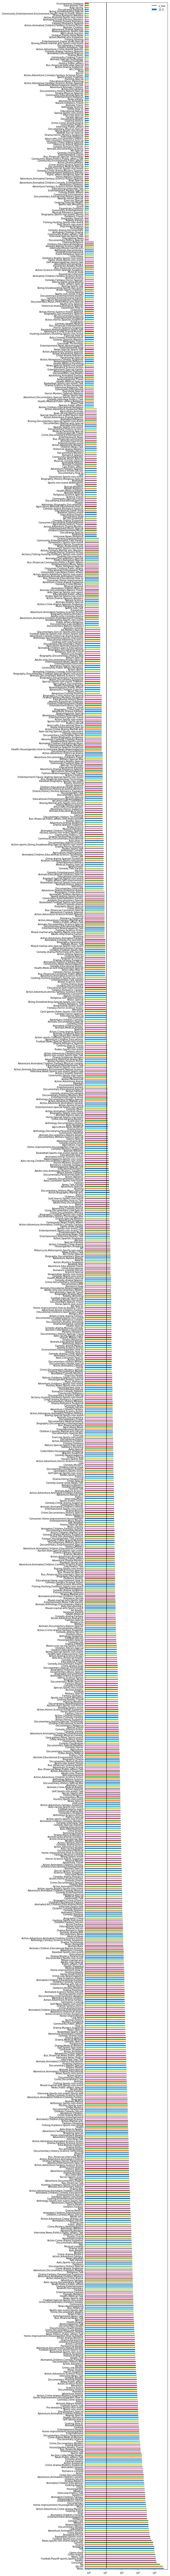

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

# df_program_viewing.loc[df_program_viewing['gen_in_advance_1'] != 'None'] #.shape[0] / df_program_viewing.shape[0]

# df_program_viewing.loc[df_program_viewing['gen_in_advance_1'].notnull()].shape[0] / df_program_viewing.shape[0]
a = df_program_viewing['Program Genre'].value_counts()
a.plot(kind='barh', figsize=(10,150), )
plt.xscale('log')
plt.vlines(a.quantile(0.40),ymin=0,ymax=a.shape[0])
plt.legend(["v_line",a.quantile(0.4)])

plt.tight_layout()

# 1291

In [13]:
# df_program_viewing.loc[df_program_viewing['Program Genre'].str.lower().str.contains('community'), ['Program Title','Program Genre']].drop_duplicates()

# df_program_viewing.loc[df_program_viewing['Program Genre'] == 'Event', ['Program Title','Program Genre']].drop_duplicates()

# len(df_program_viewing['Program Genre'].unique())

# df_program_viewing.head()

df_program_viewing = pd.read_pickle(os.path.join(data_directory, 'viewing_clustered.pkl.gz'))

# df_program_viewing.loc[df_program_viewing['gen_in_advance_1'] != 'None'].shape[0] / df_program_viewing.shape[0]

# df_genres.loc[df_genres[0] == 'action,animated,drama,fantasy']

# 'action,animated,drama,fantasy' in dist_mat.index.values
# b=df_genres.loc[df_genres[0]=='Spanish', 1].unique()
# genre_count['gay/lesbian']
# pd.DataFrame(a)
# len(a)

# individual_rep = {'animals': 'nature',
#                   'gaming': 'game-show',
#                   'interview': 'talk',
#                   'parade': 'special',
#                   'war': 'military',
#                   'soap': 'drama',
#                   'sitcom': 'comedy',
#                   'historical-drama': 'history,drama',
#                   'comedy-drama': 'comedy,drama'
#                  }
# rep_dict = dict()
# rep_dict.update({**sports_rep,**variety_rep, **life_style_rep, **outdoors_rep, **natrue_rep, **science_rep,  **individual_rep})

# # df_genres.iloc[351]
# df_genres.loc[(df_genres[1].str.contains('event')) & (~df_genres[1].str.contains('sports')),1]
# pd.Series(b).replace(rep_dict, regex=True).apply(make_bag_of_words)

# len(a)

In [15]:
clustering_mapping = {
    4: 'comedy',
    0: 'talk',
    18: 'entertainment',
    7: 'life-style',
    13: 'pefessional',
    14: 'news',
    3: 'sports',
    2: 'science',
    12: 'nature',
    8: 'animated',
    17: 'special',
    1: 'suspense',
    5: 'drama',
    10: 'fantasy',
    6: 'action',
    11: 'o',
    15: 'na',
    9: 'adults-only',
    16: 'documentary',
    -1: np.NaN
}
df_program_viewing['Program Genre'] = df_program_viewing['Program Genre'].map(clustering_mapping)
df_program_viewing['prev_1_genre'] = df_program_viewing.groupby('Device ID')['Program Genre'].shift(1).fillna('*')
df_program_viewing['prev_2_genre'] = df_program_viewing.groupby('Device ID')['Program Genre'].shift(2).fillna('**')
df_program_viewing.loc[(df_program_viewing['prev_2_genre'] == '**') 
                       & (df_program_viewing['prev_1_genre'] != '*'),'prev_2_genre'] = '*'
df_program_viewing["gen_in_advance_1"] = df_program_viewing["gen_in_advance_1"].map(clustering_mapping)
df_program_viewing["gen_in_dev_hh_1"] = df_program_viewing["gen_in_dev_hh_1"].map(clustering_mapping)

In [21]:
df_program_viewing.to_pickle(os.path.join(data_directory, 'viewing_clustered.pkl.gz'),compression='gzip')